### Sobre o conjunto de dados
O conjunto de dados oferece informações abrangentes sobre os fatores de saúde que influenciam o desenvolvimento da osteoporose, incluindo detalhes demográficos, escolhas de estilo de vida, histórico médico e indicadores de saúde óssea. O objetivo é facilitar a pesquisa na previsão da osteoporose, permitindo que modelos de aprendizado de máquina identifiquem indivíduos em risco. A análise de fatores como idade, sexo, alterações hormonais e hábitos de vida pode ajudar a melhorar o manejo da osteoporose e as estratégias de prevenção.
  
https://www.kaggle.com/datasets/amitvkulkarni/lifestyle-factors-influencing-osteoporosis

Id	Age	Gender	Hormonal Changes	Family History	Race/Ethnicity	Body Weight	Calcium Intake	Vitamin D Intake	Physical Activity	Smoking	Alcohol Consumption	Medical Conditions	Medications	Prior Fractures	Osteoporosis
Legenda do Dataframe
- ID: identificador unico
- Age (idade): Idade do individuo em anos
- Gender(Genero): O genero do individuo. Pode ser "Masculino"ou "Feminino"
- Hormonal Changes(Mudancas Hormonais): Indica se o individuo sofreu alteracoes hormonais, principalmente relacionadas á menopausa
- Family History (Historia da Familia): Indica se há histórico familiar de Osteoporose ou fraturas. Pode ser "Sim"ou "Não"
- Race/Ethnicity (Raça/Etnia): A raça ou etnia do individuo. Isso pode incluir categorias como "caucasiano", "afro-americano","asiatico"etc.
- Body Weight (Peso Corporal): O satus do peso corporal do individuo. Isso pode ser "normal"ou "Abaixo do peso".
- Calcium Intake (Ingestão de Calcio): O nivel de ingestão de calcio na dieta do individuo. Isto pode ser "Baixo"ou "Adequado"
- Vitamin D Intake (Ingestão de Vitamina): O nivel de ingestão de vitamina D na Dieta do individuo. Pode ser "Insuficiente"ou "Suficiente"
- Physical Activity(Atividade física): Indica o nivel de atividade fisica do individuo. Pode ser "Sedentário"para baixos níveis de atividade ou "Ativo"para exercicios
- Smoking (Fuma): Se fuma ou Não
- Alcohol Consumption (Consome Alcool): Se consome bebida alcoolica ou não
- Medical Conditions (Condicao Medica): Se tem alguma doenca
- Medications (Medicacao):Se toma alguma medicacao
- Prior Fractures (Fraturas Prévias): se Tem Fraturas
- Osteoporosis (Osteoporose): Se tem osteoporose ou não 
 

### O que é a Osteoporose?

A osteoporose é uma doença em que ocorre a perda da massa óssea, fazendo com que os ossos fiquem frágeis e porosos, tornando-se consequentemente mais sensíveis e quebradiços

##############################################################################################################

In [1]:
pip install sweetviz


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Limpeza Base de Dados

In [2]:
# Bibliotecas utilizadas

# Visualizar dados (DataViz)
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv



#Manipulação de dados
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Ler o arquivo csv em um dataframe
df = pd.read_csv('osteoporosis.csv')

# Imprimir as 5 primeiras linhas do dataframe
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [4]:
# Verificar os dados das colunas numericas a fim de verificar se há dados faltante
df.describe()

,Id,Age,Osteoporosis
count,1958.000000,1958.000000,1958.000000
mean,105515.320735,39.101124,0.500000
std,2589.407806,21.355424,0.500128
min,101008.000000,18.000000,0.000000
25%,103348.500000,21.000000,0.000000
50%,105469.000000,32.000000,0.500000
75%,107755.000000,53.000000,1.000000
max,109996.000000,90.000000,1.000000


In [5]:
# Verificar se há ids duplicados
duplicates = df.duplicated(subset='Id', keep=False)

# Mostrar as linhas com os ids duplicados
df_duplicates = df[duplicates]
df_duplicates

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
6,107447,20,Male,Postmenopausal,Yes,African American,Underweight,Adequate,Sufficient,Sedentary,No,NaN,Rheumatoid Arthritis,NaN,No,1
10,101592,47,Female,Postmenopausal,Yes,Asian,Normal,Low,Sufficient,Active,Yes,NaN,NaN,NaN,Yes,1
11,103872,55,Female,Normal,Yes,Caucasian,Underweight,Adequate,Sufficient,Sedentary,No,Moderate,Rheumatoid Arthritis,Corticosteroids,No,1
15,109617,38,Male,Postmenopausal,Yes,African American,Normal,Adequate,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,No,1
17,106854,75,Male,Postmenopausal,No,Asian,Normal,Adequate,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,101180,20,Male,Postmenopausal,No,African American,Normal,Adequate,Sufficient,Active,Yes,Moderate,NaN,NaN,Yes,0
1945,109343,19,Female,Normal,Yes,Asian,Normal,Adequate,Sufficient,Active,Yes,NaN,Hyperthyroidism,NaN,No,0
1952,109609,23,Male,Postmenopausal,No,Caucasian,Normal,Low,Insufficient,Sedentary,No,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,0
1954,106463,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0


In [6]:
# Filtrar o DataFrame para visualizar linhas com id = 107447
filtered_df = df[df['Id'] == 107447]

# Imprime o DataFrame filtrado
filtered_df

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
6,107447,20,Male,Postmenopausal,Yes,African American,Underweight,Adequate,Sufficient,Sedentary,No,NaN,Rheumatoid Arthritis,NaN,No,1
724,107447,43,Female,Normal,Yes,Asian,Underweight,Adequate,Sufficient,Sedentary,Yes,NaN,Hyperthyroidism,Corticosteroids,Yes,1


In [7]:
# Filtrar o Dtaframe verificr as linhas com id = 101592
filtered_df = df[df['Id'] == 101592]

# mostrar o resultado do filtro
filtered_df

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
10,101592,47,Female,Postmenopausal,Yes,Asian,Normal,Low,Sufficient,Active,Yes,NaN,NaN,NaN,Yes,1
1309,101592,19,Female,Normal,No,African American,Normal,Adequate,Sufficient,Active,Yes,Moderate,Hyperthyroidism,NaN,Yes,0


Conforme verificado acima, podemos perceber que há linhas com numeros de Ids iguais porém as demais colunas com informações diferentes uma das outras, sendo assim, não podemos excluir as linhas levando em consideração somente os numeros de Ids iguais.

In [8]:
# Identificando as linhas inteiras duplicadas
duplicates = df.duplicated()

# Exibindo as linhas inteirasduplicadas
duplicates.value_counts()

False    1958
Name: count, dtype: int64

Conforme podemos confirmar acima, não temos nenhuma linha que esteja duplicada. Sendo assim, não iremos excluir linhas por duplicidade de id.

In [9]:
#Traduzir o nome das colunas para Portugues
data = df.rename(columns={'Age': 'Idade', 'Gender': 'Genero', 'Hormonal Changes': 'Mudancas Hormonais', 'Family History': 'Historico Familiar', 'Race/Ethnicity': 'Raça/Etnia', 'Body Weight': 'Peso Corporal', 'Calcium Intake': 'Ingestao de Calcio', 'Vitamin D Intake': 'Ingestao de Vitamina D', 'Physical Activity': 'Atividade Fisica', 'Smoking': 'Fuma', 'Alcohol Consumption': 'Consome Bebida Alcoolica', 'Medical Conditions': 'Condicao Medica', 'Medications': 'Medicacao', 'Prior Fractures': 'Fraturas Previas', 'Osteoporosis':'Osteoporose'})
data

,Id,Idade,Genero,Mudancas Hormonais,Historico Familiar,Raça/Etnia,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,106130,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0
1954,106463,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,103142,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,105187,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [10]:
# Apagar a coluna ID
data = data.drop('Id', axis=1)
data

,Idade,Genero,Mudancas Hormonais,Historico Familiar,Raça/Etnia,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0
1954,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [11]:
# Informacoes basica do dataframe
print(data.info())

data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Idade                     1958 non-null   int64 
 1   Genero                    1958 non-null   object
 2   Mudancas Hormonais        1958 non-null   object
 3   Historico Familiar        1958 non-null   object
 4   Raça/Etnia                1958 non-null   object
 5   Peso Corporal             1958 non-null   object
 6   Ingestao de Calcio        1958 non-null   object
 7   Ingestao de Vitamina D    1958 non-null   object
 8   Atividade Fisica          1958 non-null   object
 9   Fuma                      1958 non-null   object
 10  Consome Bebida Alcoolica  970 non-null    object
 11  Condicao Medica           1311 non-null   object
 12  Medicacao                 973 non-null    object
 13  Fraturas Previas          1958 non-null   object
 14  Osteoporose             

,Idade,Genero,Mudancas Hormonais,Historico Familiar,Raça/Etnia,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0
1954,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


##### Coluna Genero

Genero
Male      992
Female    966
Name: count, dtype: int64


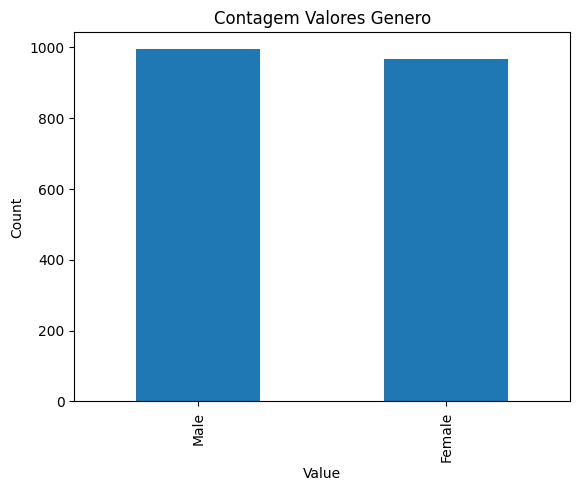

In [12]:
# contar o número de ocorrências de cada valor único na coluna 'Genero'
counts = data['Genero'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Genero
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Cioluna Genero
plt.title('Contagem Valores Genero')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [13]:
# Faça o one-hot encoding da coluna categorica "Genero"
df_one_hot = pd.get_dummies(data, columns=["Genero"])

# Exiba o DataFrame atualizado
df_one_hot.head()

,Idade,Mudancas Hormonais,Historico Familiar,Raça/Etnia,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male
0,69,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,True,False
1,32,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1,True,False
2,89,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1,True,False
3,78,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1,True,False
4,38,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1,False,True


In [14]:
# Alterar os dados das colunas Genero_Female e Genero_Male de True para 1 e False para 0

df_one_hot['Genero_Female'] = df_one_hot['Genero_Female'].map({True: 1, False: 0})
df_one_hot['Genero_Male'] = df_one_hot['Genero_Male'].map({True: 1, False: 0})

# Verificar
df_one_hot

,Idade,Mudancas Hormonais,Historico Familiar,Raça/Etnia,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male
0,69,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,1,0
1,32,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1,1,0
2,89,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1,1,0
3,78,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1,1,0
4,38,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0,1,0
1954,23,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0,1,0
1955,34,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0,1,0
1956,25,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0,0,1


In [15]:
# alterar os dados das colunas Genero_Female e Genero_Male para tipo int
df_one_hot['Genero_Female'] = df_one_hot['Genero_Female'].astype(int)
df_one_hot['Genero_Male'] = df_one_hot['Genero_Male'].astype(int)

#verificar as alteracoes 
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Idade                     1958 non-null   int64 
 1   Mudancas Hormonais        1958 non-null   object
 2   Historico Familiar        1958 non-null   object
 3   Raça/Etnia                1958 non-null   object
 4   Peso Corporal             1958 non-null   object
 5   Ingestao de Calcio        1958 non-null   object
 6   Ingestao de Vitamina D    1958 non-null   object
 7   Atividade Fisica          1958 non-null   object
 8   Fuma                      1958 non-null   object
 9   Consome Bebida Alcoolica  970 non-null    object
 10  Condicao Medica           1311 non-null   object
 11  Medicacao                 973 non-null    object
 12  Fraturas Previas          1958 non-null   object
 13  Osteoporose               1958 non-null   int64 
 14  Genero_Female           

A coluna Genero é uma coluna que o tipo é object, tendo quantidade de sexo bem parecida, sendo casos masculino 26 a mais que o feminino em uma base com total de 1958 dados por coluna, sendo assim, são dados balanceados para o estudo.
No caso em questão alteramos o tipo de dado de object para int.

#### Coluna Mudancas hormonais

Mudancas Hormonais
Normal            981
Postmenopausal    977
Name: count, dtype: int64


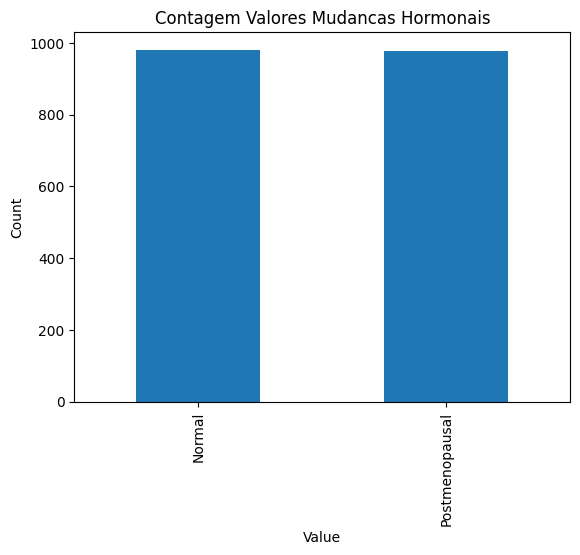

In [16]:
# contar o número de ocorrências de cada valor único na coluna 'Mudancas Hormonais'
counts = df_one_hot['Mudancas Hormonais'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Mudancas Hormonais
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Mudancas Hormonais
plt.title('Contagem Valores Mudancas Hormonais')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [17]:
# Modificar os dados de Normal para 0 e Postmenopausal para 1
df_one_hot['Mudancas Hormonais'] = df_one_hot['Mudancas Hormonais'].apply(lambda x: 0 if x == 'Normal' else 1 if x == 'Postmenopausal' else df_one_hot['Mudancas Hormonais'])
df_one_hot

,Idade,Mudancas Hormonais,Historico Familiar,Raça/Etnia,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male
0,69,0,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,1,0
1,32,0,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1,1,0
2,89,1,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1,1,0
3,78,0,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1,1,0
4,38,1,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0,1,0
1954,23,1,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0,1,0
1955,34,1,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0,1,0
1956,25,1,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0,0,1


Mudancas Hormonais
0    981
1    977
Name: count, dtype: int64


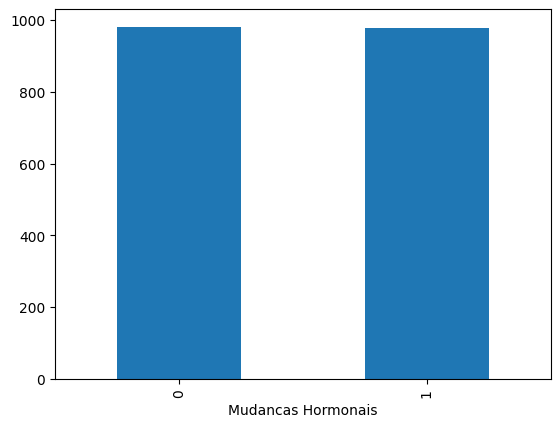

In [18]:
# contar o número de ocorrências de cada valor único na coluna 'Mudancas Hormonais'
counts = df_one_hot['Mudancas Hormonais'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Mudancas Hormonais
print(counts)

In [19]:
# Verificar se o tipo dos dados da coluna Mudancas hormonais foram alteradas de object para int
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Idade                     1958 non-null   int64 
 1   Mudancas Hormonais        1958 non-null   int64 
 2   Historico Familiar        1958 non-null   object
 3   Raça/Etnia                1958 non-null   object
 4   Peso Corporal             1958 non-null   object
 5   Ingestao de Calcio        1958 non-null   object
 6   Ingestao de Vitamina D    1958 non-null   object
 7   Atividade Fisica          1958 non-null   object
 8   Fuma                      1958 non-null   object
 9   Consome Bebida Alcoolica  970 non-null    object
 10  Condicao Medica           1311 non-null   object
 11  Medicacao                 973 non-null    object
 12  Fraturas Previas          1958 non-null   object
 13  Osteoporose               1958 non-null   int64 
 14  Genero_Female           

Podemos verificar que a coluna Mudancas Hormonais temos 981 casos como normal e 977 casos como Postmenopausal, sendo casos considerados com mudancas hormonais normais sendo 4  a mais dos que os considerados Postmenopausal. Nos dados da coluna em questao, alteramos de object para int, ficando 0 para os casos identificados como Normal e 1 para os casos identificados como Postmenopausal.

#### Coluna Historico Familiar

Historico Familiar
No     998
Yes    960
Name: count, dtype: int64


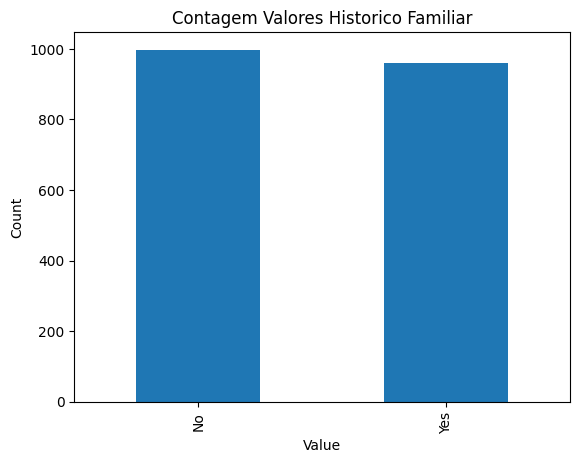

In [20]:
# contar o número de ocorrências de cada valor único na coluna 'Historico Familiar'
counts = df_one_hot['Historico Familiar'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Historico Familiar
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Historico Familiar
plt.title('Contagem Valores Historico Familiar')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [21]:
# Modificar os dados de No para 0 e Yes para 1
df_one_hot['Historico Familiar'] = df_one_hot['Historico Familiar'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Yes' else df_one_hot['Historico Familiar'])
df_one_hot

,Idade,Mudancas Hormonais,Historico Familiar,Raça/Etnia,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male
0,69,0,1,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,1,0
1,32,0,1,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1,1,0
2,89,1,0,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1,1,0
3,78,0,0,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1,1,0
4,38,1,1,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0,1,0
1954,23,1,1,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0,1,0
1955,34,1,0,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0,1,0
1956,25,1,0,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0,0,1


Historico Familiar
0    998
1    960
Name: count, dtype: int64


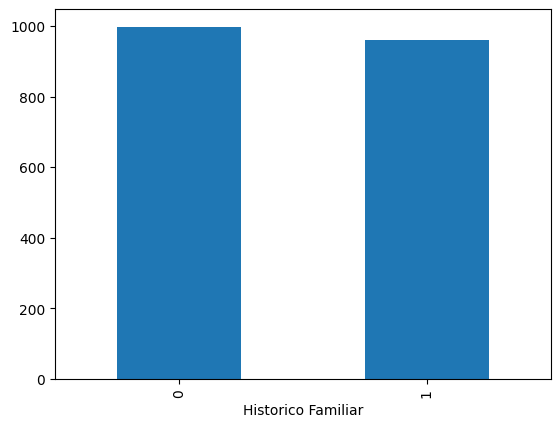

In [22]:
# contar o número de ocorrências de cada valor único na coluna 'Historico Familiar'
counts = df_one_hot['Historico Familiar'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Historico Familiar
print(counts)

In [23]:
# Verificar se o tipo dos dados da coluna  Historico Familiar foram alteradas de object para int
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Idade                     1958 non-null   int64 
 1   Mudancas Hormonais        1958 non-null   int64 
 2   Historico Familiar        1958 non-null   int64 
 3   Raça/Etnia                1958 non-null   object
 4   Peso Corporal             1958 non-null   object
 5   Ingestao de Calcio        1958 non-null   object
 6   Ingestao de Vitamina D    1958 non-null   object
 7   Atividade Fisica          1958 non-null   object
 8   Fuma                      1958 non-null   object
 9   Consome Bebida Alcoolica  970 non-null    object
 10  Condicao Medica           1311 non-null   object
 11  Medicacao                 973 non-null    object
 12  Fraturas Previas          1958 non-null   object
 13  Osteoporose               1958 non-null   int64 
 14  Genero_Female           

Podemos verificar que a coluna Historico Familiar temos 998 casos que não possuem historico familiar e 960 que possuem historico familia, sendo casos 38 casos a mais no dataframe dos que possuem historico familia com osteoporose.
Nos dados da coluna em questao, alteramos de object para int, ficando 0 para os casos onde não há historico na familia e 1 para os casos identificados que há historico familiar.

#### Coluna Raça/Etnia

Raça/Etnia
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64


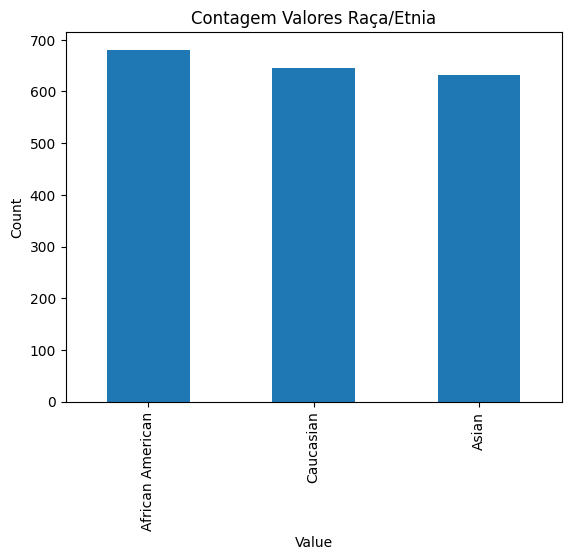

In [24]:
# contar o número de ocorrências de cada valor único na coluna 'Raça/Etnia'
counts = df_one_hot['Raça/Etnia'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Raça/Etnia
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Raça/Etnia
plt.title('Contagem Valores Raça/Etnia')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [25]:
# Faça o one-hot encoding da coluna categorica "Raça/Etnia"
df = pd.get_dummies(df_one_hot, columns=["Raça/Etnia"])

# Exiba o DataFrame atualizado
df.head()

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian
0,69,0,1,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,1,0,False,True,False
1,32,0,1,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1,1,0,False,True,False
2,89,1,0,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1,1,0,False,False,True
3,78,0,0,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1,1,0,False,False,True
4,38,1,1,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1,0,1,True,False,False


In [26]:
# Alterar os dados das colunas Raca/Etnia_African American, Raça/Etnia_Asian e Raça/Etnia_Caucasian  de True para 1 e False para 0

df['Raça/Etnia_African American'] = df['Raça/Etnia_African American'].map({True: 1, False: 0})
df['Raça/Etnia_Asian'] = df['Raça/Etnia_Asian'].map({True: 1, False: 0})
df['Raça/Etnia_Caucasian'] = df['Raça/Etnia_Caucasian'].map({True: 1, False: 0})

# Verificar
df

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian
0,69,0,1,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,1,0,0,1,0
1,32,0,1,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1,1,0,0,1,0
2,89,1,0,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1,1,0,0,0,1
3,78,0,0,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1,1,0,0,0,1
4,38,1,1,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0,1,0,1,0,0
1954,23,1,1,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0,1,0,0,0,1
1955,34,1,0,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0,1,0,1,0,0
1956,25,1,0,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0,0,1,1,0,0


A coluna Raça/Etnia é uma coluna que cntem tres tipos de Etnias, tendo as 3 Racas/Etnias quantidades bem aproximadas de casos de cada uma, sendo , Raça/Etnia_African American que tem 681 casos, a Raça/Etnia_Asian tendo 631 caso sendo 50 casos abaixo do African American e Raça/Etnia_Caucasian tendo 646 casos sendo 35 a menos que African American e 15 acima do Asian, entando equiparados em mais de 600 casos cada um, sendo assim, considera-se dados balanceados nessa coluna.
No caso em questão alteramos o tipo de dado de object para int.

#### Coluna Peso Corporal

Peso Corporal
Normal         1027
Underweight     931
Name: count, dtype: int64


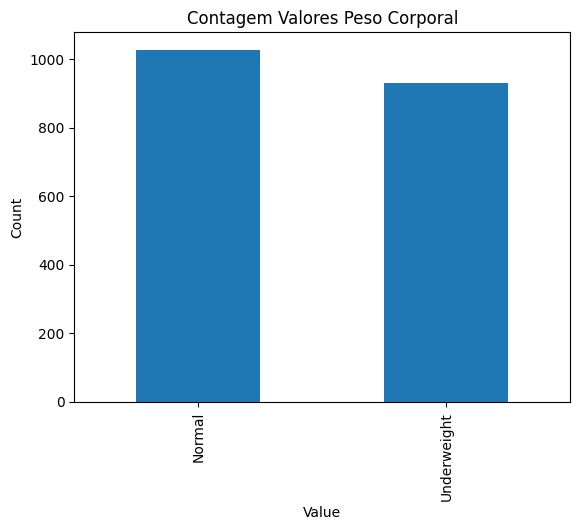

In [27]:
# contar o número de ocorrências de cada valor único na coluna 'Raça/Etnia'
counts = df['Peso Corporal'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Raça/Etnia
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Raça/Etnia
plt.title('Contagem Valores Peso Corporal')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [28]:
# Modificar os dados de Normal para 0 e Underweight para 1
df['Peso Corporal'] = df['Peso Corporal'].apply(lambda x: 0 if x == 'Normal' else 1 if x == 'Underweight' else df['Peso Corporal'])
df

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian
0,69,0,1,1,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,1,0,0,1,0
1,32,0,1,1,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1,1,0,0,1,0
2,89,1,0,0,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1,1,0,0,0,1
3,78,0,0,1,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1,1,0,0,0,1
4,38,1,1,0,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,0,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0,1,0,1,0,0
1954,23,1,1,1,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0,1,0,0,0,1
1955,34,1,0,1,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0,1,0,1,0,0
1956,25,1,0,0,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0,0,1,1,0,0


In [29]:
# Verificar se o tipo dos dados da coluna  Peso Corporal foram alteradas de object para int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Idade                        1958 non-null   int64 
 1   Mudancas Hormonais           1958 non-null   int64 
 2   Historico Familiar           1958 non-null   int64 
 3   Peso Corporal                1958 non-null   int64 
 4   Ingestao de Calcio           1958 non-null   object
 5   Ingestao de Vitamina D       1958 non-null   object
 6   Atividade Fisica             1958 non-null   object
 7   Fuma                         1958 non-null   object
 8   Consome Bebida Alcoolica     970 non-null    object
 9   Condicao Medica              1311 non-null   object
 10  Medicacao                    973 non-null    object
 11  Fraturas Previas             1958 non-null   object
 12  Osteoporose                  1958 non-null   int64 
 13  Genero_Female                1958

Podemos verificar que na coluna Peso Corporal temos 1027 casos como Normal e 931 casos como Abaixo do Peso, sendo casos considerados como Peso Corporal Normal sendo 96  a mais dos que os considerados abaixo do peso. 
Nos dados da coluna em questao, alteramos de object para int, ficando 0 para os casos identificados como Normal e 1 para os casos identificados como abaixo do peso.

#### Coluna Ingestao de Calcio

Ingestao de Calcio
Low         1004
Adequate     954
Name: count, dtype: int64


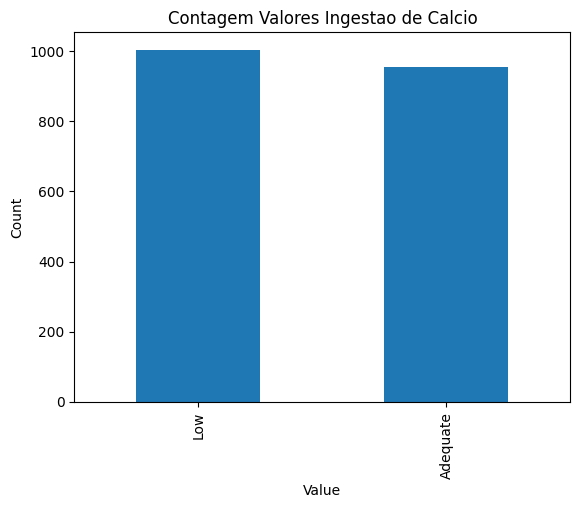

In [30]:
# contar o número de ocorrências de cada valor único na coluna 'Ingestao de Calcio'
counts = df['Ingestao de Calcio'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Ingestao de Calcio
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Ingestao de Calcio
plt.title('Contagem Valores Ingestao de Calcio')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

Ingestao de Calcio
Low         1004
Adequate     954
Name: count, dtype: int64


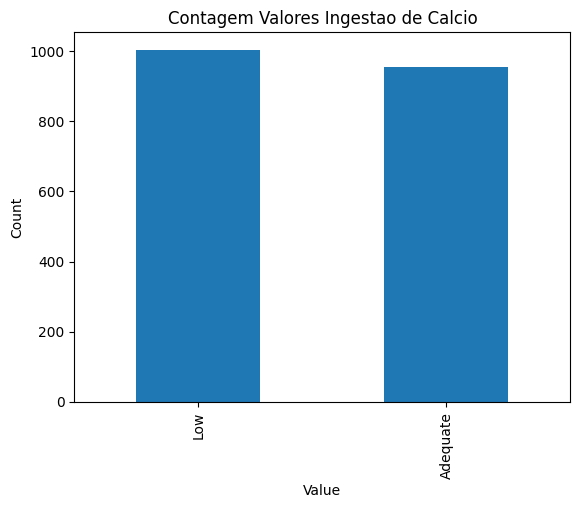

In [31]:
# contar o número de ocorrências de cada valor único na coluna 'Ingestao de Calcio'
counts = df['Ingestao de Calcio'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Ingestao de Calcio
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Ingestao de Calcio
plt.title('Contagem Valores Ingestao de Calcio')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [32]:
# Modificar os dados de Adequate para 0 e Low para 1
df['Ingestao de Calcio'] = df['Ingestao de Calcio'].apply(lambda x: 0 if x == 'Adequate' else 1 if x == 'Low' else df['Ingestao de Calcio'])
df

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian
0,69,0,1,1,1,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,1,0,0,1,0
1,32,0,1,1,1,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1,1,0,0,1,0
2,89,1,0,0,0,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1,1,0,0,0,1
3,78,0,0,1,0,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1,1,0,0,0,1
4,38,1,1,0,1,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,0,0,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0,1,0,1,0,0
1954,23,1,1,1,1,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0,1,0,0,0,1
1955,34,1,0,1,1,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0,1,0,1,0,0
1956,25,1,0,0,1,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0,0,1,1,0,0


In [33]:
# Verificar se o tipo dos dados da coluna Ingestao de Dados  foram alteradas de object para int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Idade                        1958 non-null   int64 
 1   Mudancas Hormonais           1958 non-null   int64 
 2   Historico Familiar           1958 non-null   int64 
 3   Peso Corporal                1958 non-null   int64 
 4   Ingestao de Calcio           1958 non-null   int64 
 5   Ingestao de Vitamina D       1958 non-null   object
 6   Atividade Fisica             1958 non-null   object
 7   Fuma                         1958 non-null   object
 8   Consome Bebida Alcoolica     970 non-null    object
 9   Condicao Medica              1311 non-null   object
 10  Medicacao                    973 non-null    object
 11  Fraturas Previas             1958 non-null   object
 12  Osteoporose                  1958 non-null   int64 
 13  Genero_Female                1958

Podemos verificar que na coluna Ingestão de Calcio temos 1004 casos como Abaixo e 954 casos como Adequado, sendo casos considerados como Ingestao de Calcio Abaixo 50  a mais dos que os considerados a ingestao de calcio adequada. 
Nos dados da coluna em questao, alteramos de object para int, ficando 0 para os casos identificados como Adequatte e 1 para os casos identificados como Low .

#### Coluna Ingestao de Vitamina D 

Ingestao de Vitamina D
Sufficient      1011
Insufficient     947
Name: count, dtype: int64


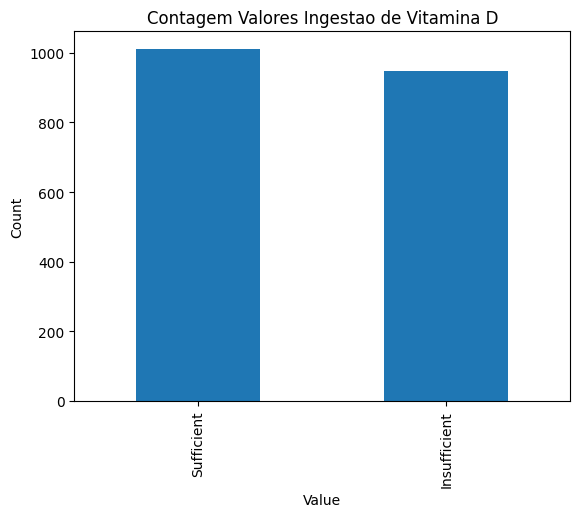

In [34]:
# contar o número de ocorrências de cada valor único na coluna 'Ingestao de Vitamina D'
counts = df['Ingestao de Vitamina D'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Ingestao de Vitamina D
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Ingestao de Vitamina D
plt.title('Contagem Valores Ingestao de Vitamina D')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [35]:
# Modificar os dados de Adequate para 0 e Low para 1
df['Ingestao de Vitamina D'] = df['Ingestao de Vitamina D'].apply(lambda x: 0 if x == 'Sufficient' else 1 if x == 'Insufficient' else df['Ingestao de Vitamina D'])
df

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian
0,69,0,1,1,1,0,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,1,0,0,1,0
1,32,0,1,1,1,0,Sedentary,No,NaN,NaN,NaN,Yes,1,1,0,0,1,0
2,89,1,0,0,0,0,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1,1,0,0,0,1
3,78,0,0,1,0,1,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1,1,0,0,0,1
4,38,1,1,0,1,0,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,0,0,0,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0,1,0,1,0,0
1954,23,1,1,1,1,1,Active,No,NaN,NaN,Corticosteroids,No,0,1,0,0,0,1
1955,34,1,0,1,1,0,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0,1,0,1,0,0
1956,25,1,0,0,1,1,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0,0,1,1,0,0


In [36]:
# Verificar se o tipo dos dados da coluna  Ingestao de Vitamina D foram alteradas de object para int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Idade                        1958 non-null   int64 
 1   Mudancas Hormonais           1958 non-null   int64 
 2   Historico Familiar           1958 non-null   int64 
 3   Peso Corporal                1958 non-null   int64 
 4   Ingestao de Calcio           1958 non-null   int64 
 5   Ingestao de Vitamina D       1958 non-null   int64 
 6   Atividade Fisica             1958 non-null   object
 7   Fuma                         1958 non-null   object
 8   Consome Bebida Alcoolica     970 non-null    object
 9   Condicao Medica              1311 non-null   object
 10  Medicacao                    973 non-null    object
 11  Fraturas Previas             1958 non-null   object
 12  Osteoporose                  1958 non-null   int64 
 13  Genero_Female                1958

Podemos verificar que na coluna Ingestao de Vitamina D temos 1011 casos como Suficiente e 947 casos como insuficiente, sendo casos considerados como Ingestao de Vitamina D suficiente 64  a mais dos que os considerados  Ingestao de Vitamina D insuficiente. 
Nos dados da coluna em questao, alteramos de object para int, ficando 0 para os casos identificados como Suficiente e 1 para os casos identificados como Insuficiente .

#### Coluna Atividade Fisica

Atividade Fisica
Active       1021
Sedentary     937
Name: count, dtype: int64


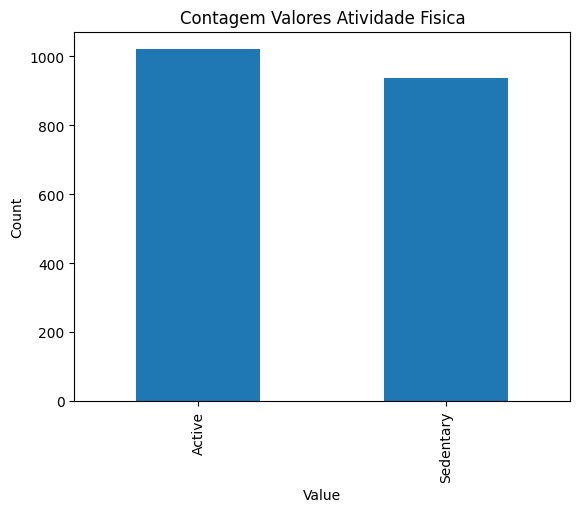

In [37]:
# contar o número de ocorrências de cada valor único na coluna 'Ingestao de Vitamina D'
counts = df['Atividade Fisica'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Ingestao de Vitamina D
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Ingestao de Vitamina D
plt.title('Contagem Valores Atividade Fisica')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [38]:
# Modificar os dados de Active para 0 e Sedentary para 1
df['Atividade Fisica'] = df['Atividade Fisica'].apply(lambda x: 0 if x == 'Active' else 1 if x == 'Sedentary' else df['Atividade Fisica'])
df

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian
0,69,0,1,1,1,0,1,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,1,0,0,1,0
1,32,0,1,1,1,0,1,No,NaN,NaN,NaN,Yes,1,1,0,0,1,0
2,89,1,0,0,0,0,0,No,Moderate,Hyperthyroidism,Corticosteroids,No,1,1,0,0,0,1
3,78,0,0,1,0,1,1,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1,1,0,0,0,1
4,38,1,1,0,1,0,0,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,0,0,0,1,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0,1,0,1,0,0
1954,23,1,1,1,1,1,0,No,NaN,NaN,Corticosteroids,No,0,1,0,0,0,1
1955,34,1,0,1,1,0,1,No,NaN,Hyperthyroidism,NaN,No,0,1,0,1,0,0
1956,25,1,0,0,1,1,1,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0,0,1,1,0,0


In [ ]:
# Verificar se o tipo dos dados da coluna  Atividade Fisica foram alteradas de object para int
df.info()

Podemos verificar que na coluna de Atividade Fisica temos 1021 casos como Ativos e 937 casos como Sedentarios, sendo casos considerados como Ativos 84  a mais dos que os considerados Sedentarios. 
Nos dados da coluna em questao, alteramos de object para int, ficando 0 para os casos identificados como Ativos e 1 para os casos identificados como Sedentarios .

#### Coluna Fuma

Fuma
Yes    982
No     976
Name: count, dtype: int64


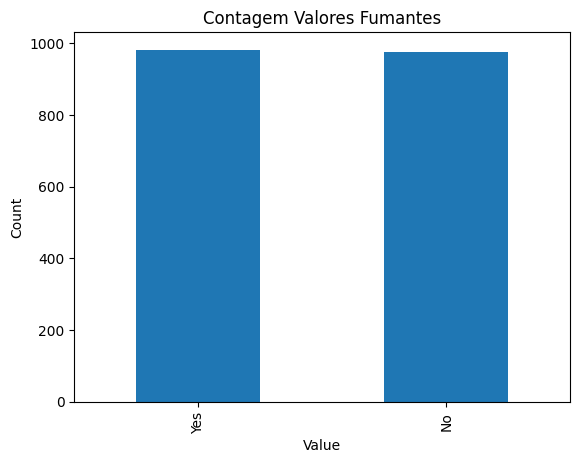

In [39]:
# contar o número de ocorrências de cada valor único na coluna de 'Fumantes'
counts = df['Fuma'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Fumantes
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Fumantes
plt.title('Contagem Valores Fumantes')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [40]:
# Modificar os dados de No para 0 e Yes para 1
df['Fuma'] = df['Fuma'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Yes' else df['Fuma'])
df

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian
0,69,0,1,1,1,0,1,1,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,1,0,0,1,0
1,32,0,1,1,1,0,1,0,NaN,NaN,NaN,Yes,1,1,0,0,1,0
2,89,1,0,0,0,0,0,0,Moderate,Hyperthyroidism,Corticosteroids,No,1,1,0,0,0,1
3,78,0,0,1,0,1,1,1,NaN,Rheumatoid Arthritis,Corticosteroids,No,1,1,0,0,0,1
4,38,1,1,0,1,0,0,1,NaN,Rheumatoid Arthritis,NaN,Yes,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,0,0,0,1,1,Moderate,Rheumatoid Arthritis,NaN,Yes,0,1,0,1,0,0
1954,23,1,1,1,1,1,0,0,NaN,NaN,Corticosteroids,No,0,1,0,0,0,1
1955,34,1,0,1,1,0,1,0,NaN,Hyperthyroidism,NaN,No,0,1,0,1,0,0
1956,25,1,0,0,1,1,1,1,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0,0,1,1,0,0


In [41]:
# Verificar se o tipo dos dados da coluna Fuma foram alteradas de object para int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Idade                        1958 non-null   int64 
 1   Mudancas Hormonais           1958 non-null   int64 
 2   Historico Familiar           1958 non-null   int64 
 3   Peso Corporal                1958 non-null   int64 
 4   Ingestao de Calcio           1958 non-null   int64 
 5   Ingestao de Vitamina D       1958 non-null   int64 
 6   Atividade Fisica             1958 non-null   int64 
 7   Fuma                         1958 non-null   int64 
 8   Consome Bebida Alcoolica     970 non-null    object
 9   Condicao Medica              1311 non-null   object
 10  Medicacao                    973 non-null    object
 11  Fraturas Previas             1958 non-null   object
 12  Osteoporose                  1958 non-null   int64 
 13  Genero_Female                1958

Podemos verificar que na coluna de Fuma temos 982 casos como Yes fumantes e 976 casos como No Fuma, sendo casos considerados como Fumantes 06  a mais dos que os considerados não fumantes. 
Nos dados da coluna em questão, alteramos de object para int, ficando 0 para os casos identificados como não fumantes e 1 para os casos identificados como Fumantes .

#### Coluna Consome Bebida Alcoolica

Consome Bebida Alcoolica
Moderate    970
Name: count, dtype: int64


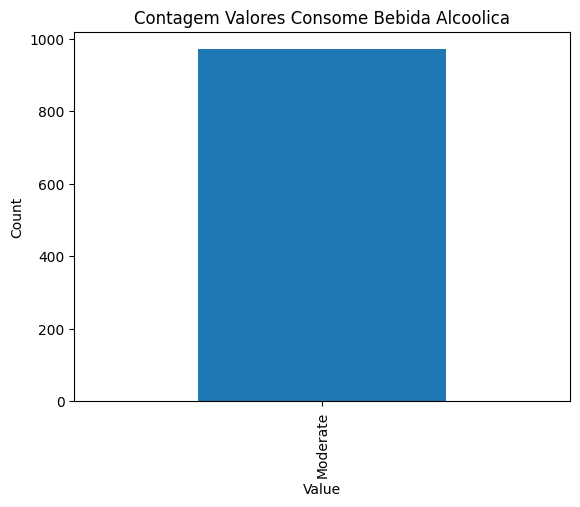

In [42]:
# contar o número de ocorrências de cada valor único na coluna de 'Consome Bebida Alcoolica'
counts = df['Consome Bebida Alcoolica'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Fumantes
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Fumantes
plt.title('Contagem Valores Consome Bebida Alcoolica')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [43]:
# No lugar dos valores NaN colocar No
df['Consome Bebida Alcoolica'] = df['Consome Bebida Alcoolica'].fillna('No')
df

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian
0,69,0,1,1,1,0,1,1,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,1,0,0,1,0
1,32,0,1,1,1,0,1,0,No,NaN,NaN,Yes,1,1,0,0,1,0
2,89,1,0,0,0,0,0,0,Moderate,Hyperthyroidism,Corticosteroids,No,1,1,0,0,0,1
3,78,0,0,1,0,1,1,1,No,Rheumatoid Arthritis,Corticosteroids,No,1,1,0,0,0,1
4,38,1,1,0,1,0,0,1,No,Rheumatoid Arthritis,NaN,Yes,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,0,0,0,1,1,Moderate,Rheumatoid Arthritis,NaN,Yes,0,1,0,1,0,0
1954,23,1,1,1,1,1,0,0,No,NaN,Corticosteroids,No,0,1,0,0,0,1
1955,34,1,0,1,1,0,1,0,No,Hyperthyroidism,NaN,No,0,1,0,1,0,0
1956,25,1,0,0,1,1,1,1,No,Rheumatoid Arthritis,Corticosteroids,Yes,0,0,1,1,0,0


Consome Bebida Alcoolica
No          988
Moderate    970
Name: count, dtype: int64


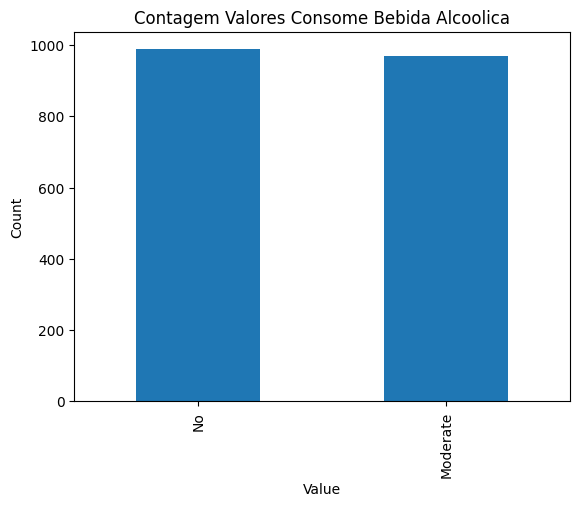

In [44]:
# Verificar se as modificacoes foram realizadas dos dados Nan para No
# contar o número de ocorrências de cada valor único na coluna de 'Consome Bebida Alcoolica'
counts = df['Consome Bebida Alcoolica'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Fumantes
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Fumantes
plt.title('Contagem Valores Consome Bebida Alcoolica')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [45]:
# Modificar os dados de No para 0 e Moderate para 1
df['Consome Bebida Alcoolica'] = df['Consome Bebida Alcoolica'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Moderate' else df['Consome Bebida Alcoolica'])
df

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian
0,69,0,1,1,1,0,1,1,1,Rheumatoid Arthritis,Corticosteroids,Yes,1,1,0,0,1,0
1,32,0,1,1,1,0,1,0,0,NaN,NaN,Yes,1,1,0,0,1,0
2,89,1,0,0,0,0,0,0,1,Hyperthyroidism,Corticosteroids,No,1,1,0,0,0,1
3,78,0,0,1,0,1,1,1,0,Rheumatoid Arthritis,Corticosteroids,No,1,1,0,0,0,1
4,38,1,1,0,1,0,0,1,0,Rheumatoid Arthritis,NaN,Yes,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,0,0,0,1,1,1,Rheumatoid Arthritis,NaN,Yes,0,1,0,1,0,0
1954,23,1,1,1,1,1,0,0,0,NaN,Corticosteroids,No,0,1,0,0,0,1
1955,34,1,0,1,1,0,1,0,0,Hyperthyroidism,NaN,No,0,1,0,1,0,0
1956,25,1,0,0,1,1,1,1,0,Rheumatoid Arthritis,Corticosteroids,Yes,0,0,1,1,0,0


In [46]:
# Verificar se o tipo dos dados da coluna Consome Bebida Alcoolica foram alteradas de object para int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Idade                        1958 non-null   int64 
 1   Mudancas Hormonais           1958 non-null   int64 
 2   Historico Familiar           1958 non-null   int64 
 3   Peso Corporal                1958 non-null   int64 
 4   Ingestao de Calcio           1958 non-null   int64 
 5   Ingestao de Vitamina D       1958 non-null   int64 
 6   Atividade Fisica             1958 non-null   int64 
 7   Fuma                         1958 non-null   int64 
 8   Consome Bebida Alcoolica     1958 non-null   int64 
 9   Condicao Medica              1311 non-null   object
 10  Medicacao                    973 non-null    object
 11  Fraturas Previas             1958 non-null   object
 12  Osteoporose                  1958 non-null   int64 
 13  Genero_Female                1958

Podemos verificar que na coluna Consome Bebida Alcoolica temos 970 casos como Moderate Consome Bebida Alcoolicas 988 casos como No Consome Bebidas Alcoolicas, sendo casos considerados como Nao consome bebida alcoolicas 18  a mais dos que os que consomem bebida alcoolica moderadamente. 
Nos dados da coluna em questão, alteramos de object para int, ficando 0 para os casos identificados como não fumantes e 1 para os casos identificados como Fumantes .

#### Coluna Condicao Medica

Condicao Medica
Hyperthyroidism         678
Rheumatoid Arthritis    633
Name: count, dtype: int64


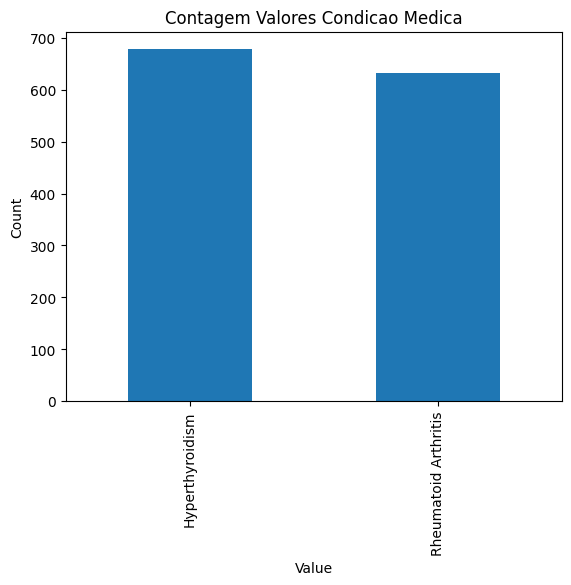

In [47]:

# contar o número de ocorrências de cada valor único na coluna de 'Condicao Medica'
counts = df['Condicao Medica'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Condicao Medica
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Condicao Medica
plt.title('Contagem Valores Condicao Medica')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [48]:
# No lugar dos valores NaN colocar No
df['Condicao Medica'] = df['Condicao Medica'].fillna('No')
df

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Condicao Medica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian
0,69,0,1,1,1,0,1,1,1,Rheumatoid Arthritis,Corticosteroids,Yes,1,1,0,0,1,0
1,32,0,1,1,1,0,1,0,0,No,NaN,Yes,1,1,0,0,1,0
2,89,1,0,0,0,0,0,0,1,Hyperthyroidism,Corticosteroids,No,1,1,0,0,0,1
3,78,0,0,1,0,1,1,1,0,Rheumatoid Arthritis,Corticosteroids,No,1,1,0,0,0,1
4,38,1,1,0,1,0,0,1,0,Rheumatoid Arthritis,NaN,Yes,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,0,0,0,1,1,1,Rheumatoid Arthritis,NaN,Yes,0,1,0,1,0,0
1954,23,1,1,1,1,1,0,0,0,No,Corticosteroids,No,0,1,0,0,0,1
1955,34,1,0,1,1,0,1,0,0,Hyperthyroidism,NaN,No,0,1,0,1,0,0
1956,25,1,0,0,1,1,1,1,0,Rheumatoid Arthritis,Corticosteroids,Yes,0,0,1,1,0,0


Condicao Medica
Hyperthyroidism         678
No                      647
Rheumatoid Arthritis    633
Name: count, dtype: int64


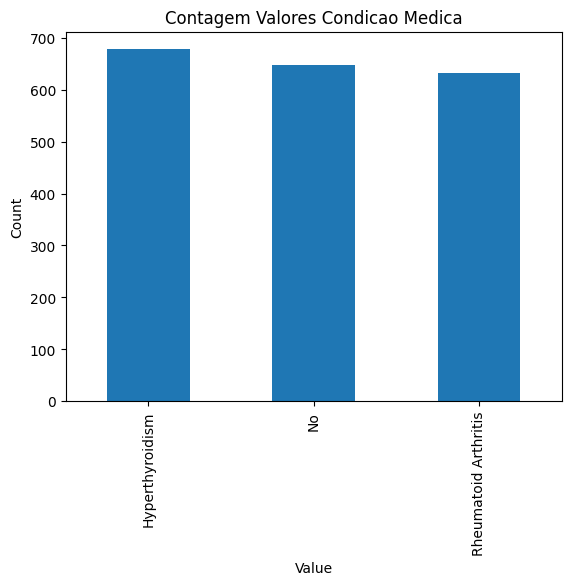

In [49]:

# contar o número de ocorrências de cada valor único na coluna de 'Condicao Medica'
counts = df['Condicao Medica'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Condicao Medica
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Condicao Medica
plt.title('Contagem Valores Condicao Medica')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [50]:
# Faça o one-hot encoding da coluna " Condicao Medica "
df_condicao = pd.get_dummies(df, columns=["Condicao Medica"])

# Exiba o DataFrame atualizado
df_condicao.head()

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian,Condicao Medica_Hyperthyroidism,Condicao Medica_No,Condicao Medica_Rheumatoid Arthritis
0,69,0,1,1,1,0,1,1,1,Corticosteroids,Yes,1,1,0,0,1,0,False,False,True
1,32,0,1,1,1,0,1,0,0,NaN,Yes,1,1,0,0,1,0,False,True,False
2,89,1,0,0,0,0,0,0,1,Corticosteroids,No,1,1,0,0,0,1,True,False,False
3,78,0,0,1,0,1,1,1,0,Corticosteroids,No,1,1,0,0,0,1,False,False,True
4,38,1,1,0,1,0,0,1,0,NaN,Yes,1,0,1,1,0,0,False,False,True


In [51]:
# Alterar os dados das colunas Medica_Hyperthyroidism e Condicao Medica_Rheumatoid Arthritis de True para 1 e False para 0

df_condicao['Condicao Medica_Hyperthyroidism'] = df_condicao['Condicao Medica_Hyperthyroidism'].map({True: 1, False: 0})
df_condicao['Condicao Medica_Rheumatoid Arthritis'] = df_condicao['Condicao Medica_Rheumatoid Arthritis'].map({True: 1, False: 0})
df_condicao['Condicao Medica_No'] = df_condicao['Condicao Medica_No'].map({True: 1, False: 0})

# Verificar
df_condicao

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian,Condicao Medica_Hyperthyroidism,Condicao Medica_No,Condicao Medica_Rheumatoid Arthritis
0,69,0,1,1,1,0,1,1,1,Corticosteroids,Yes,1,1,0,0,1,0,0,0,1
1,32,0,1,1,1,0,1,0,0,NaN,Yes,1,1,0,0,1,0,0,1,0
2,89,1,0,0,0,0,0,0,1,Corticosteroids,No,1,1,0,0,0,1,1,0,0
3,78,0,0,1,0,1,1,1,0,Corticosteroids,No,1,1,0,0,0,1,0,0,1
4,38,1,1,0,1,0,0,1,0,NaN,Yes,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,0,0,0,1,1,1,NaN,Yes,0,1,0,1,0,0,0,0,1
1954,23,1,1,1,1,1,0,0,0,Corticosteroids,No,0,1,0,0,0,1,0,1,0
1955,34,1,0,1,1,0,1,0,0,NaN,No,0,1,0,1,0,0,1,0,0
1956,25,1,0,0,1,1,1,1,0,Corticosteroids,Yes,0,0,1,1,0,0,0,0,1


In [52]:
# Verificar se o tipo dos dados da coluna Condicao Medica foram alteradas de object para int
df_condicao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Idade                                 1958 non-null   int64 
 1   Mudancas Hormonais                    1958 non-null   int64 
 2   Historico Familiar                    1958 non-null   int64 
 3   Peso Corporal                         1958 non-null   int64 
 4   Ingestao de Calcio                    1958 non-null   int64 
 5   Ingestao de Vitamina D                1958 non-null   int64 
 6   Atividade Fisica                      1958 non-null   int64 
 7   Fuma                                  1958 non-null   int64 
 8   Consome Bebida Alcoolica              1958 non-null   int64 
 9   Medicacao                             973 non-null    object
 10  Fraturas Previas                      1958 non-null   object
 11  Osteoporose                   

Podemos verificar que na coluna 
Condicao Medica temos 678 casos como Hyperthyroidism , 633 como Rheumatoid Arthritis e 647 como No. 
Nos dados da coluna em questão, alteramos de object para int .

#### Coluna Medicacao

Medicacao
Corticosteroids    973
Name: count, dtype: int64


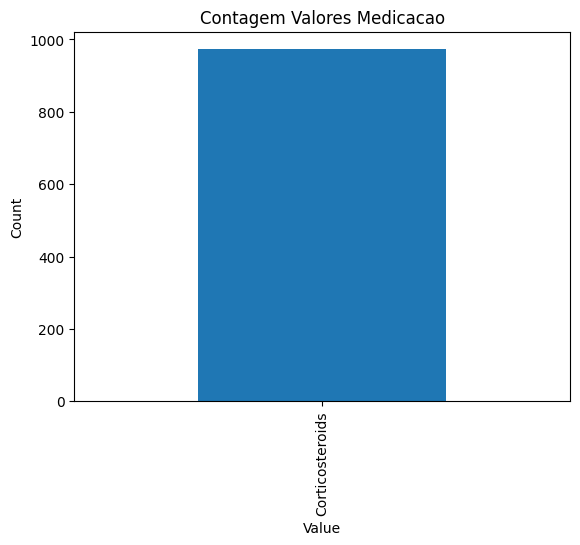

In [53]:

# contar o número de ocorrências de cada valor único na coluna de 'Medicacao'
counts = df_condicao['Medicacao'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Medicacao
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Medicacao
plt.title('Contagem Valores Medicacao')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [54]:
# No lugar dos valores NaN colocar No
df_condicao['Medicacao'] = df_condicao['Medicacao'].fillna('No')
df_condicao

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian,Condicao Medica_Hyperthyroidism,Condicao Medica_No,Condicao Medica_Rheumatoid Arthritis
0,69,0,1,1,1,0,1,1,1,Corticosteroids,Yes,1,1,0,0,1,0,0,0,1
1,32,0,1,1,1,0,1,0,0,No,Yes,1,1,0,0,1,0,0,1,0
2,89,1,0,0,0,0,0,0,1,Corticosteroids,No,1,1,0,0,0,1,1,0,0
3,78,0,0,1,0,1,1,1,0,Corticosteroids,No,1,1,0,0,0,1,0,0,1
4,38,1,1,0,1,0,0,1,0,No,Yes,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,0,0,0,1,1,1,No,Yes,0,1,0,1,0,0,0,0,1
1954,23,1,1,1,1,1,0,0,0,Corticosteroids,No,0,1,0,0,0,1,0,1,0
1955,34,1,0,1,1,0,1,0,0,No,No,0,1,0,1,0,0,1,0,0
1956,25,1,0,0,1,1,1,1,0,Corticosteroids,Yes,0,0,1,1,0,0,0,0,1


Medicacao
No                 985
Corticosteroids    973
Name: count, dtype: int64


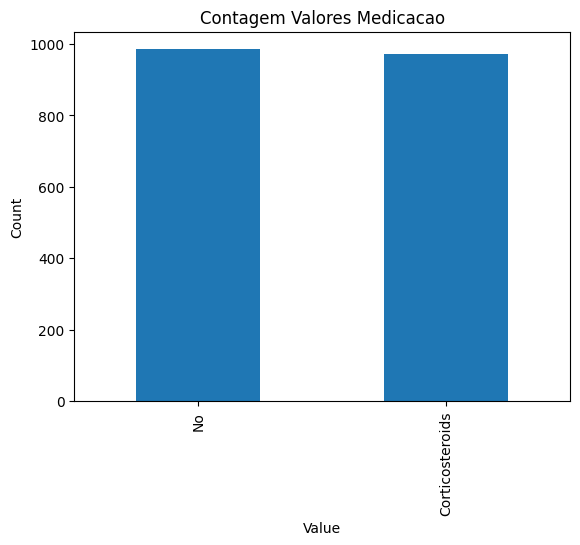

In [55]:

# contar o número de ocorrências de cada valor único na coluna de 'Medicacao'
counts = df_condicao['Medicacao'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Medicacao
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Medicacao
plt.title('Contagem Valores Medicacao')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [56]:
# Modificar os dados de No para 0 e Corticosteroids para 1
df_condicao['Medicacao'] = df_condicao['Medicacao'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Corticosteroids' else df_condicao['Medicacao'])
df_condicao

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian,Condicao Medica_Hyperthyroidism,Condicao Medica_No,Condicao Medica_Rheumatoid Arthritis
0,69,0,1,1,1,0,1,1,1,1,Yes,1,1,0,0,1,0,0,0,1
1,32,0,1,1,1,0,1,0,0,0,Yes,1,1,0,0,1,0,0,1,0
2,89,1,0,0,0,0,0,0,1,1,No,1,1,0,0,0,1,1,0,0
3,78,0,0,1,0,1,1,1,0,1,No,1,1,0,0,0,1,0,0,1
4,38,1,1,0,1,0,0,1,0,0,Yes,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,0,0,0,1,1,1,0,Yes,0,1,0,1,0,0,0,0,1
1954,23,1,1,1,1,1,0,0,0,1,No,0,1,0,0,0,1,0,1,0
1955,34,1,0,1,1,0,1,0,0,0,No,0,1,0,1,0,0,1,0,0
1956,25,1,0,0,1,1,1,1,0,1,Yes,0,0,1,1,0,0,0,0,1


In [57]:
# Verificar se o tipo dos dados da coluna Medicacao foram alteradas de object para int
df_condicao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Idade                                 1958 non-null   int64 
 1   Mudancas Hormonais                    1958 non-null   int64 
 2   Historico Familiar                    1958 non-null   int64 
 3   Peso Corporal                         1958 non-null   int64 
 4   Ingestao de Calcio                    1958 non-null   int64 
 5   Ingestao de Vitamina D                1958 non-null   int64 
 6   Atividade Fisica                      1958 non-null   int64 
 7   Fuma                                  1958 non-null   int64 
 8   Consome Bebida Alcoolica              1958 non-null   int64 
 9   Medicacao                             1958 non-null   int64 
 10  Fraturas Previas                      1958 non-null   object
 11  Osteoporose                   

Podemos verificar que na coluna Medicacao temos 973 casos como Corticosteroids e 985 casos como No utiliza medicamentos, sendo casos considerados como Nao consome medicamentos 12  a mais dos que os que consomem Corticosteroids. 
Nos dados da coluna em questão, alteramos de object para int, ficando 0 para os casos identificados como não fumantes e 1 para os casos identificados como Fumantes .

#### Coluna Fraturas Previas

Fraturas Previas
Yes    983
No     975
Name: count, dtype: int64


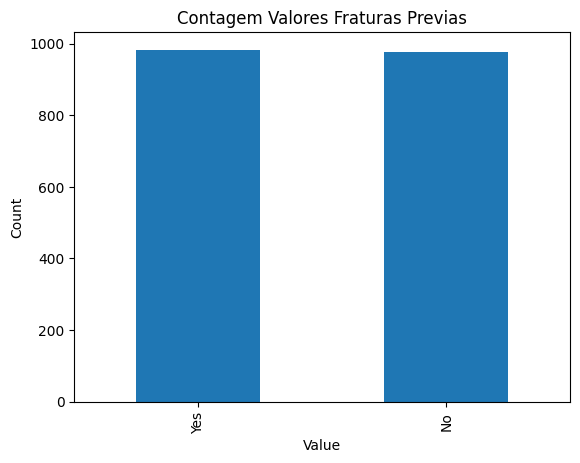

In [58]:

# contar o número de ocorrências de cada valor único na coluna de 'Fraturas Previas'
counts = df_condicao['Fraturas Previas'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Fraturas Previas
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Fraturas Previas
plt.title('Contagem Valores Fraturas Previas')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [59]:
# Modificar os dados de No para 0 e Yes para 1
df_condicao['Fraturas Previas'] = df_condicao['Fraturas Previas'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Yes' else df_condicao['Fraturas Previas'])
df_condicao

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian,Condicao Medica_Hyperthyroidism,Condicao Medica_No,Condicao Medica_Rheumatoid Arthritis
0,69,0,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,0,0,1
1,32,0,1,1,1,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0
2,89,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,0
3,78,0,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,0,0,1
4,38,1,1,0,1,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,0,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1
1954,23,1,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
1955,34,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
1956,25,1,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,1


In [60]:
# Verificar se o tipo dos dados da coluna Fraturas Previas foram alteradas de object para int
df_condicao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Idade                                 1958 non-null   int64
 1   Mudancas Hormonais                    1958 non-null   int64
 2   Historico Familiar                    1958 non-null   int64
 3   Peso Corporal                         1958 non-null   int64
 4   Ingestao de Calcio                    1958 non-null   int64
 5   Ingestao de Vitamina D                1958 non-null   int64
 6   Atividade Fisica                      1958 non-null   int64
 7   Fuma                                  1958 non-null   int64
 8   Consome Bebida Alcoolica              1958 non-null   int64
 9   Medicacao                             1958 non-null   int64
 10  Fraturas Previas                      1958 non-null   int64
 11  Osteoporose                           1958 

Podemos verificar que na coluna Fraturas Previas temos 983 casos como Yes e 975 casos como No tem Fraturas Previas, sendo casos considerados como tem Fraturas Previas 8  a mais dos que os que nao tem Fraturas Previas. 
Nos dados da coluna em questão, alteramos de object para int, ficando 0 para os casos identificados como não Fraturas Previas e 1 para os casos identificados como Fraturas Previas .

#### Salvar Dataframe Modificado

In [61]:
# Salvar o Dataframe alterado
df_condicao.to_csv('Osteoporose_atual.csv', index=False)

### DataViz (Visualização)

In [ ]:
pip install skimpy

In [62]:
# Bibliotecas utilizadas

#Manipulação de dados
import pandas as pd
import numpy as np

# Visualizar dados (DataViz)
import matplotlib.pyplot as plt
import seaborn as sns
import lux
import sweetviz as sv


# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [63]:
# Ler o arquivo csv em um dataframe
df = pd.read_csv('Osteoporose_atual.csv')

# Imprimir as 5 primeiras linhas do dataframe
df.head()

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian,Condicao Medica_Hyperthyroidism,Condicao Medica_No,Condicao Medica_Rheumatoid Arthritis
0,69,0,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,0,0,1
1,32,0,1,1,1,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0
2,89,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,0
3,78,0,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,0,0,1
4,38,1,1,0,1,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1


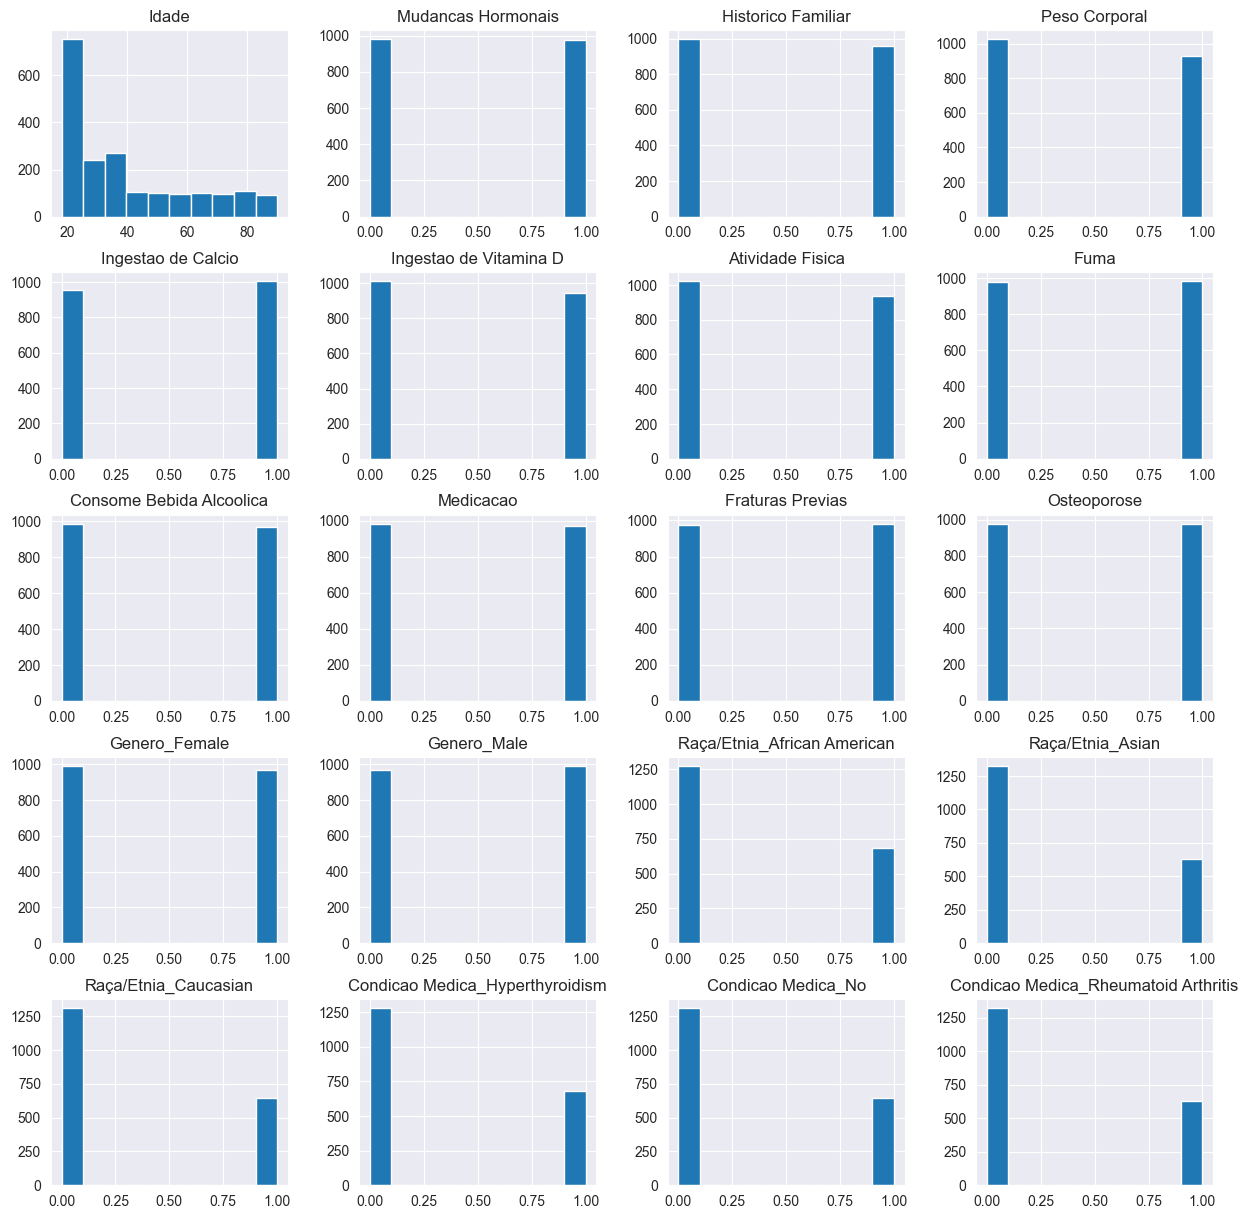

In [64]:
import matplotlib.pyplot as plt

# Set the style to darkgrid (use parentheses instead of square brackets)
sns.set_style('darkgrid')

# Assuming df is your DataFrame
df.hist(figsize=(15,15))  

# Show the plot
plt.show()

IndexError: Requested axis not found in manager

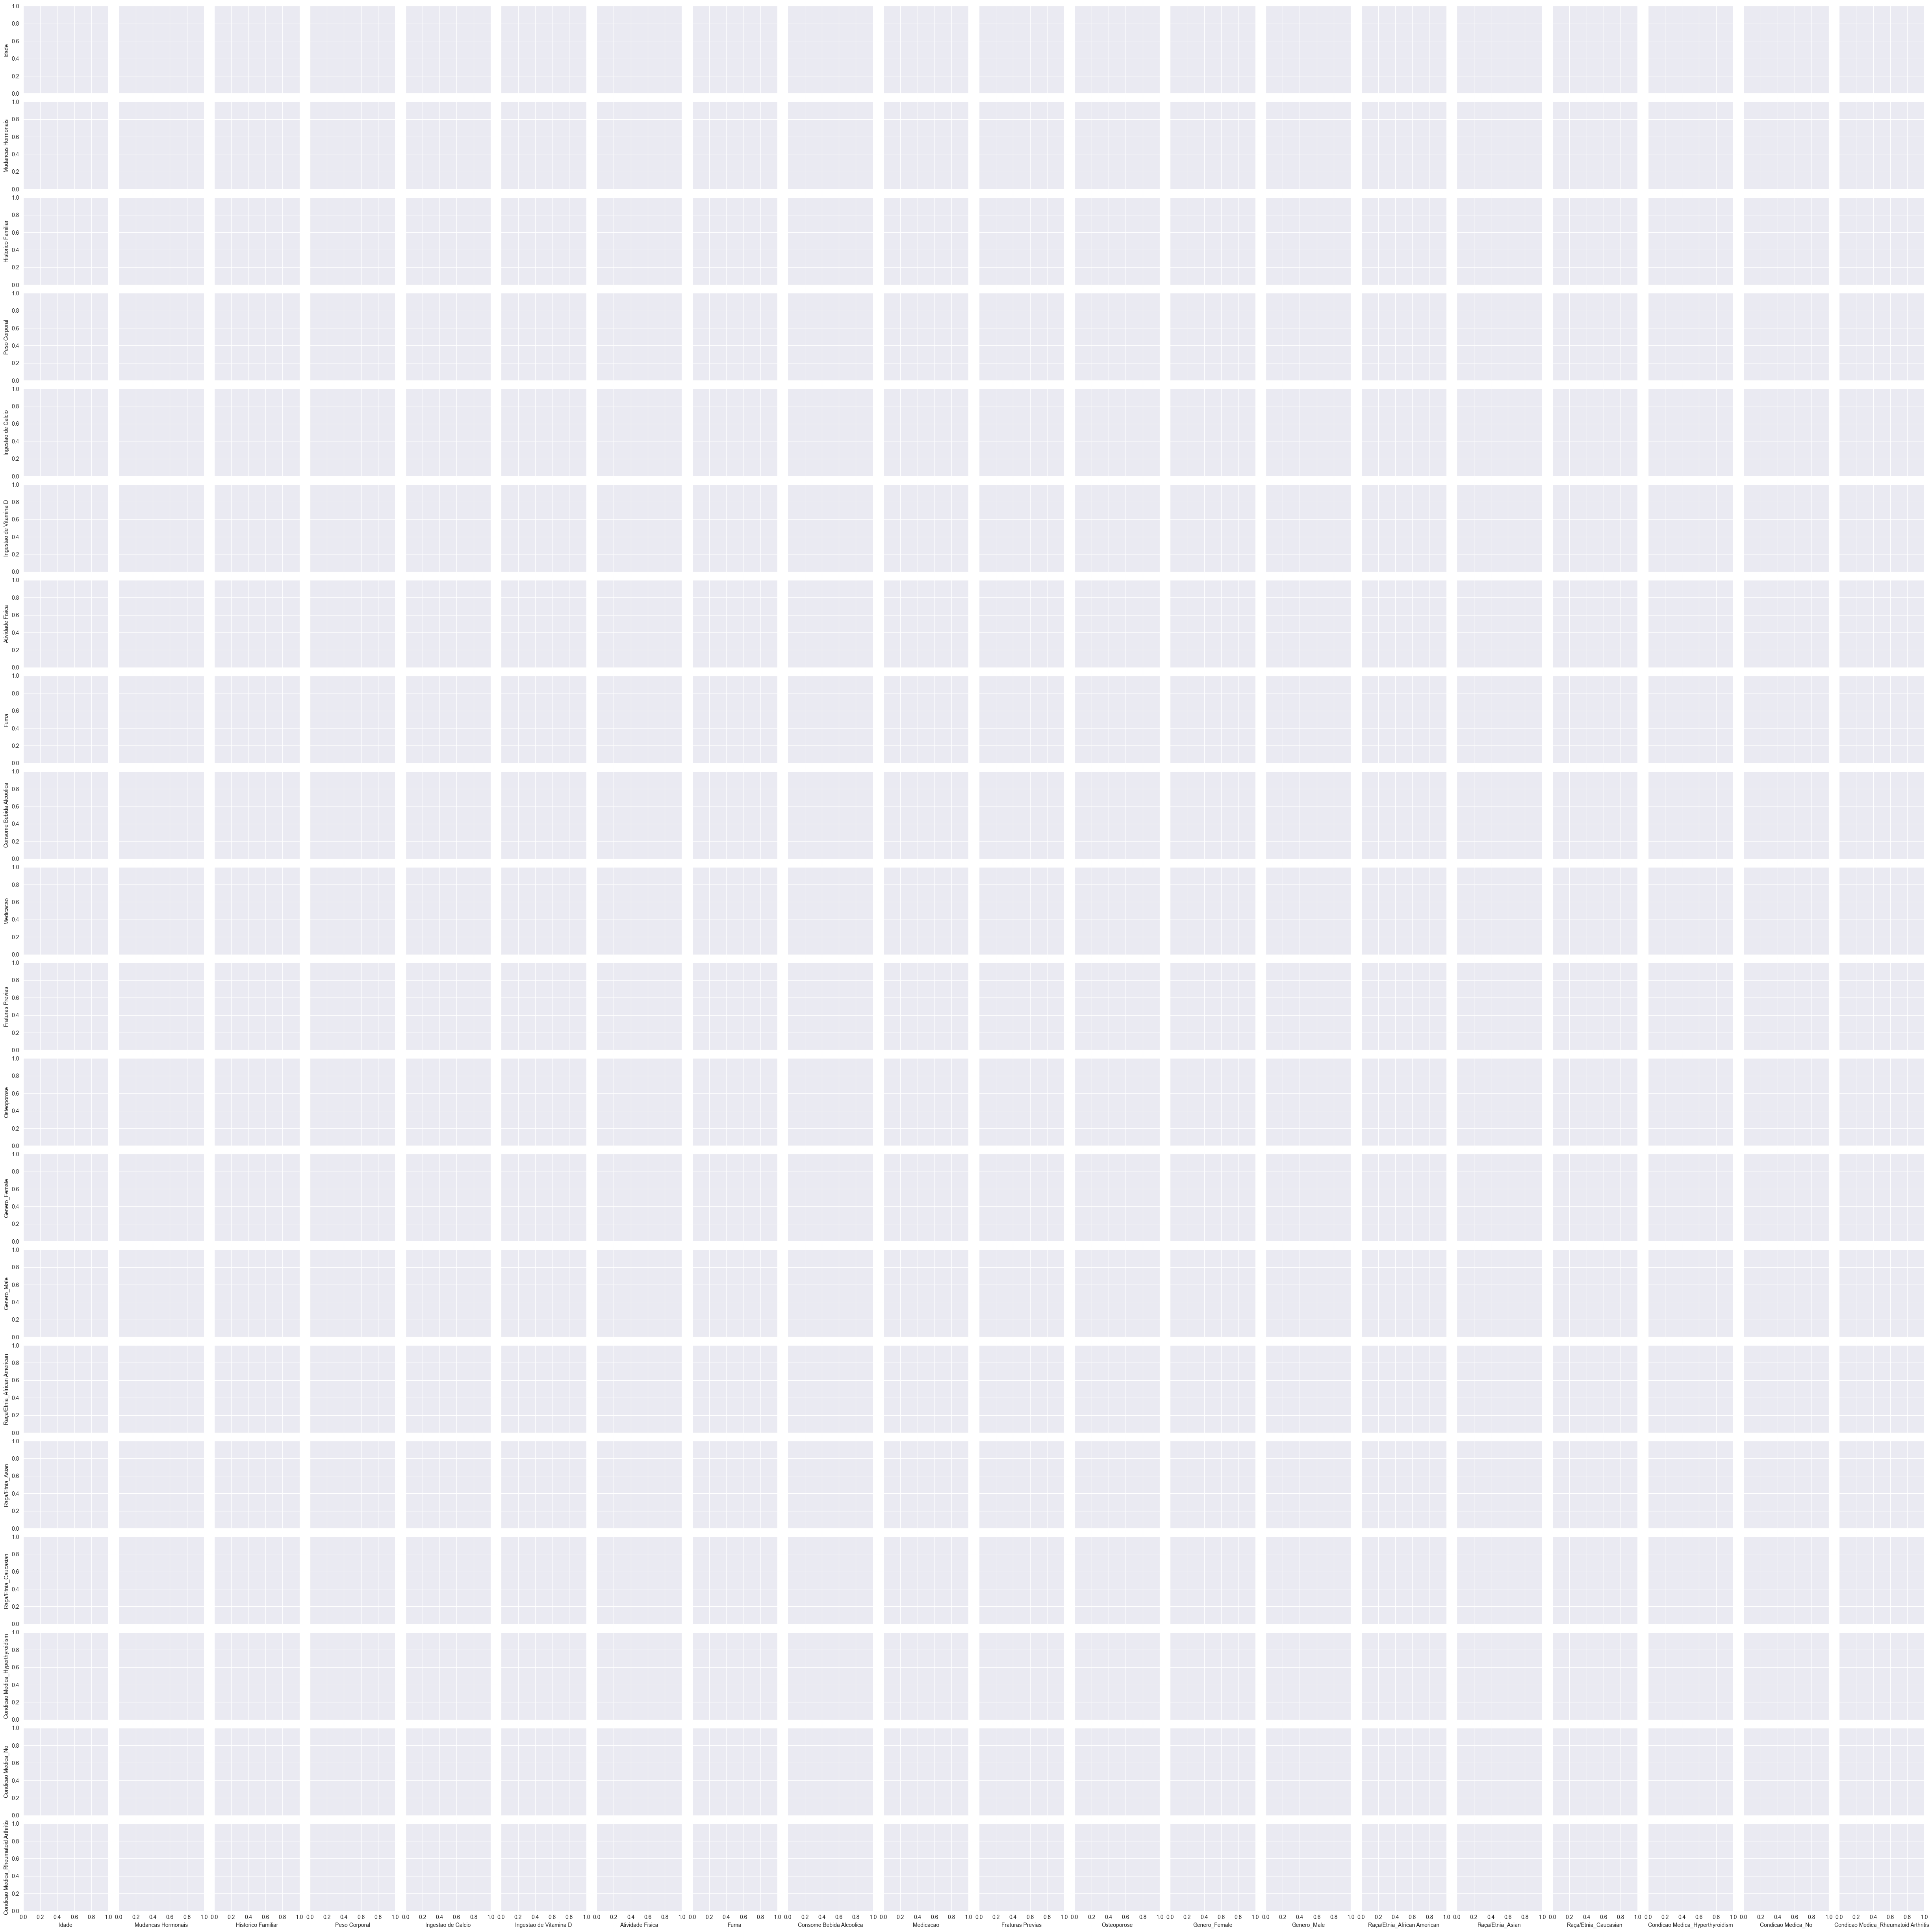

In [65]:
sns.pairplot(df, )

                                             |          | [  0%]   00:00 -> (? left)


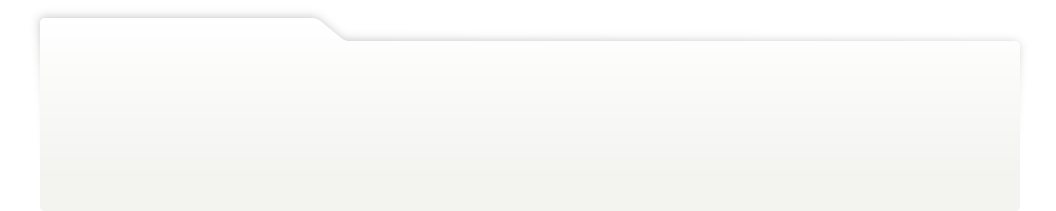
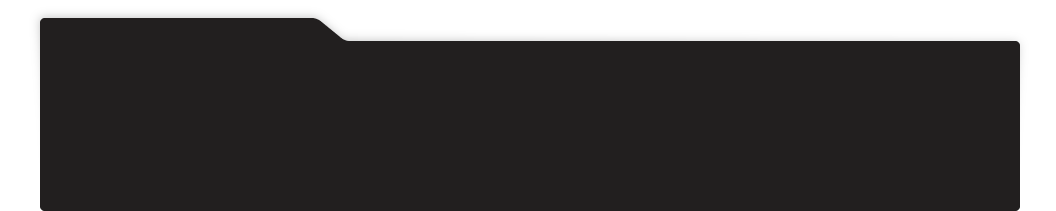
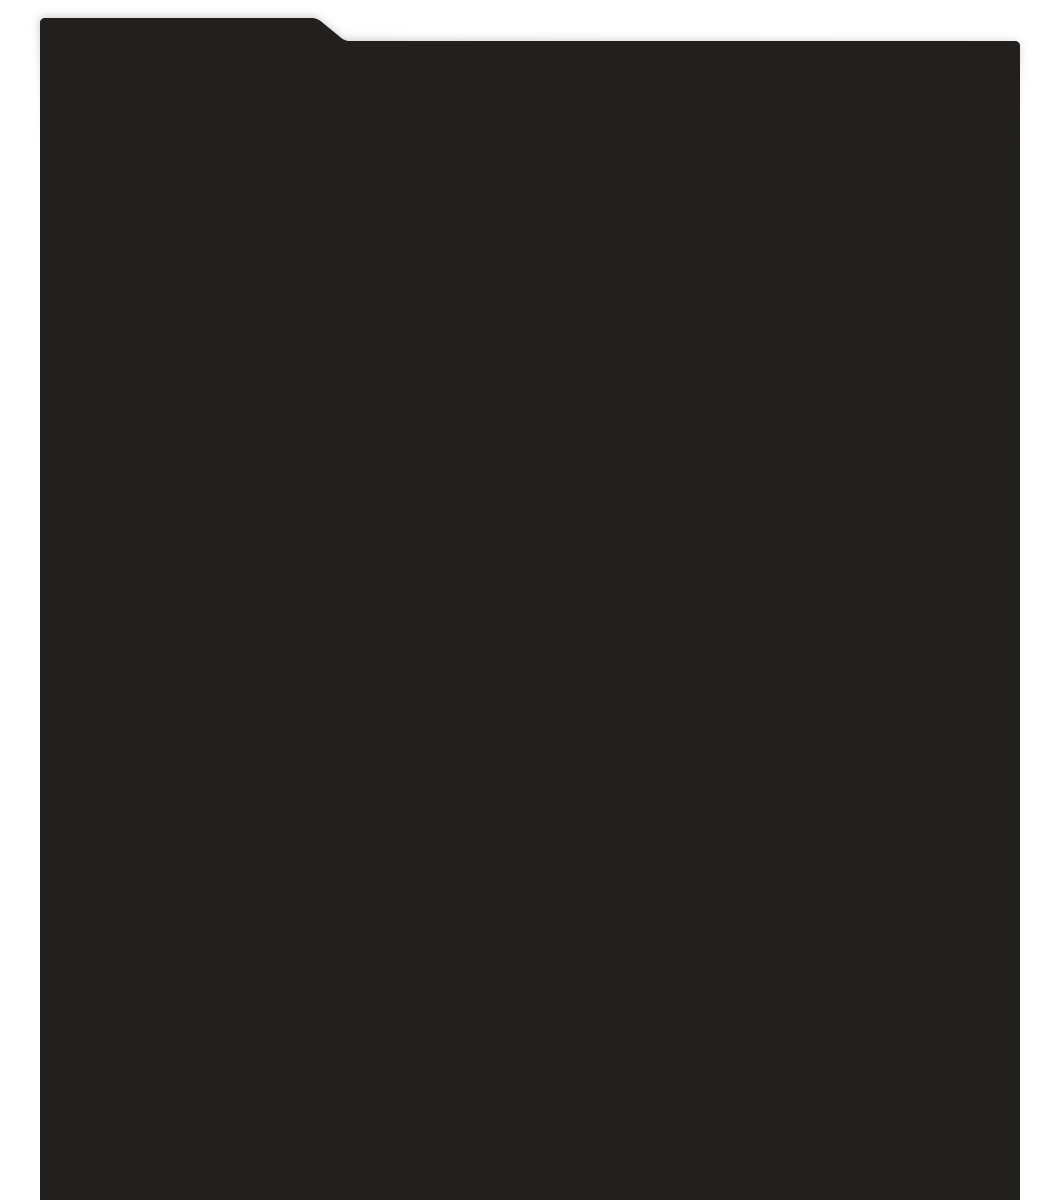
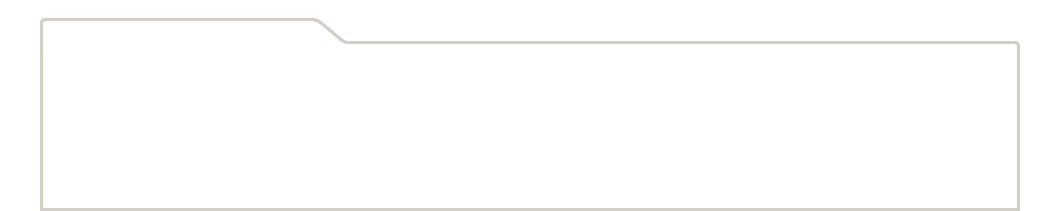
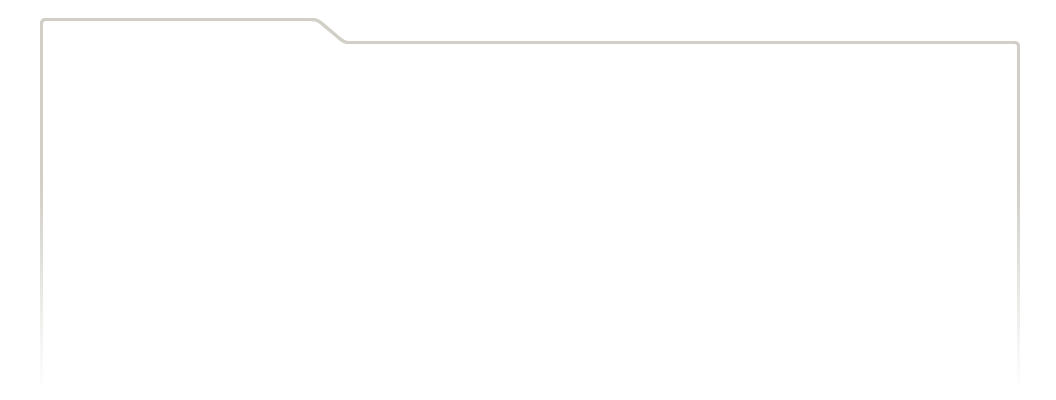
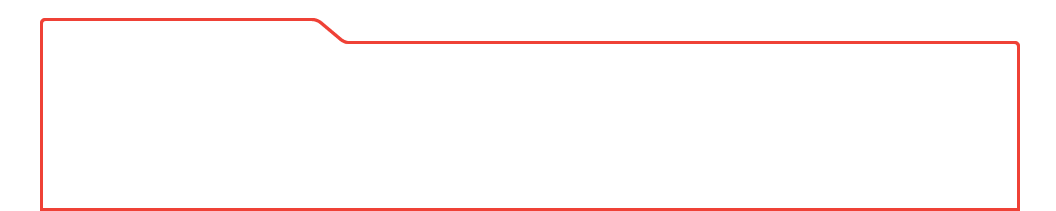
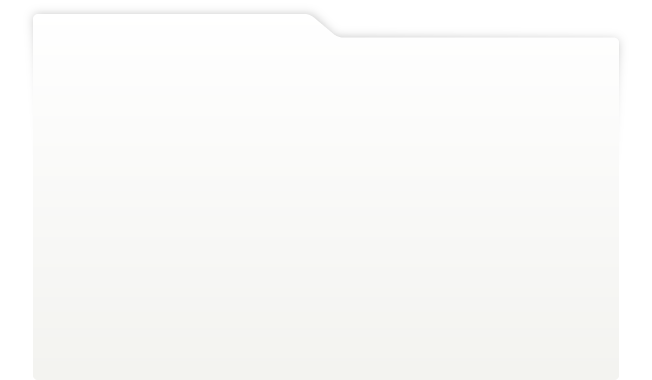
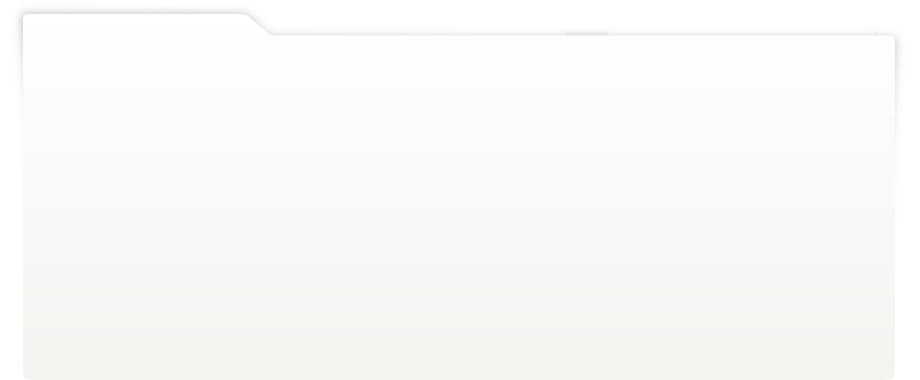
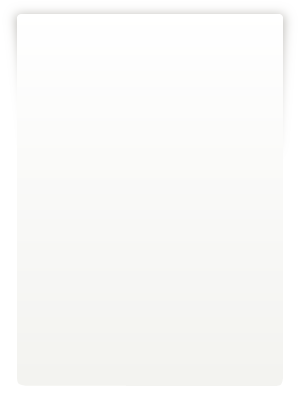
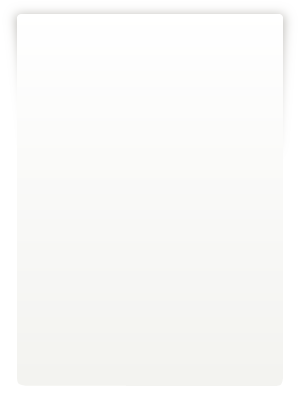
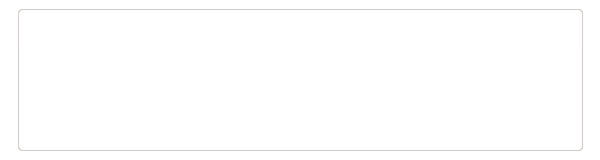
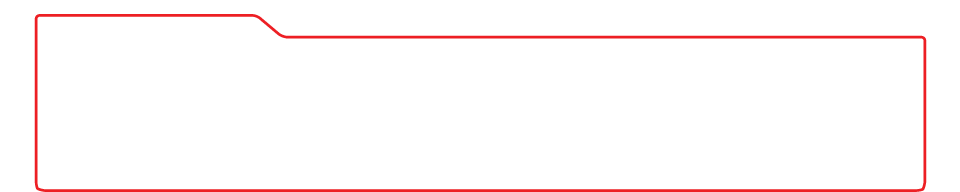
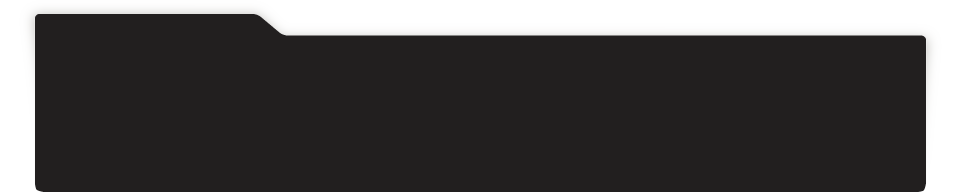
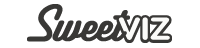
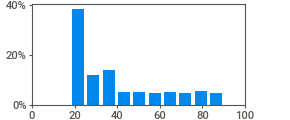
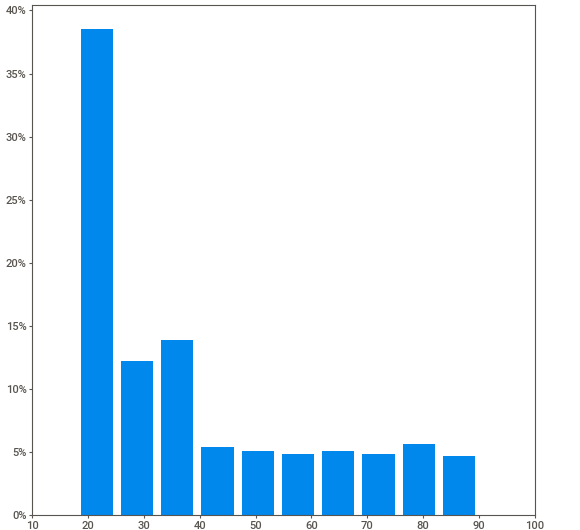
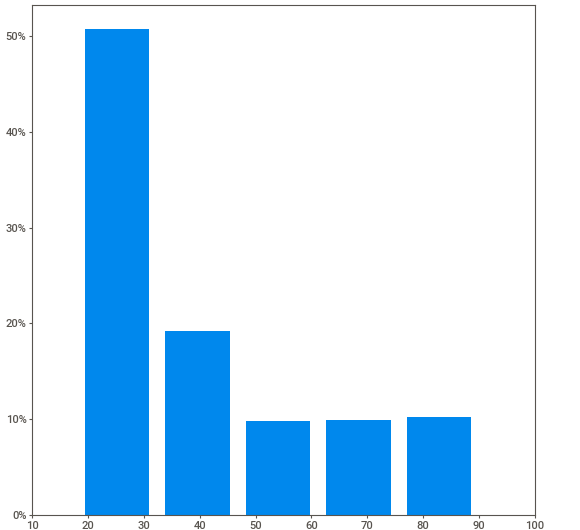
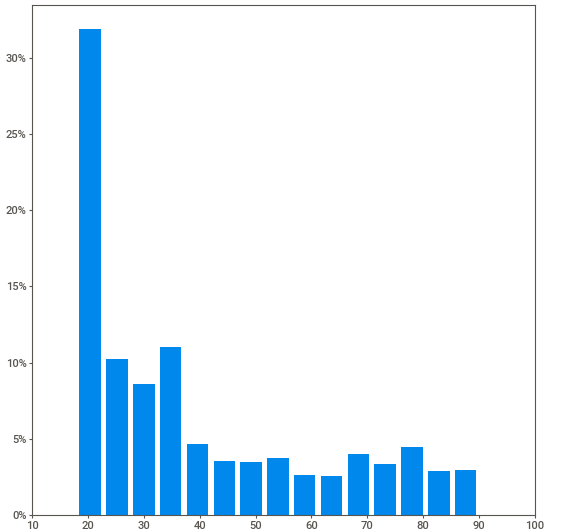
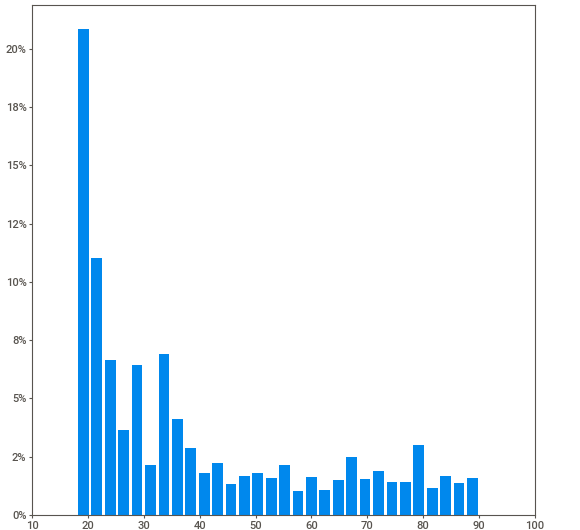
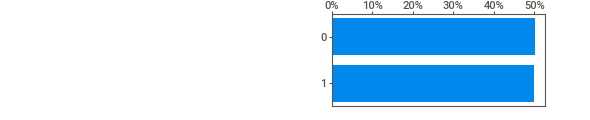
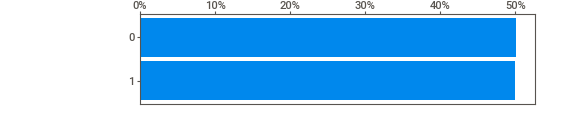
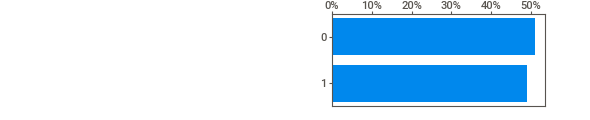
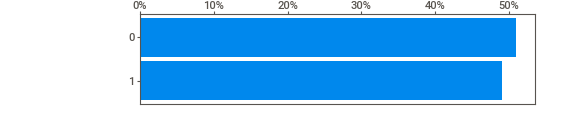
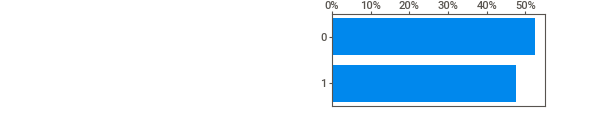
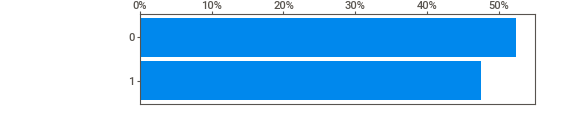
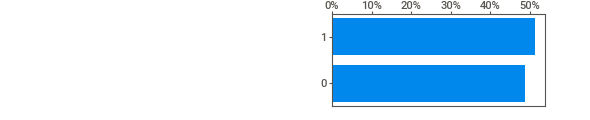
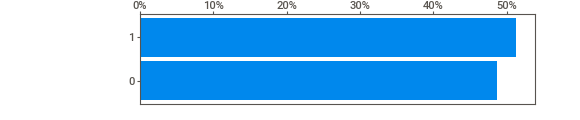
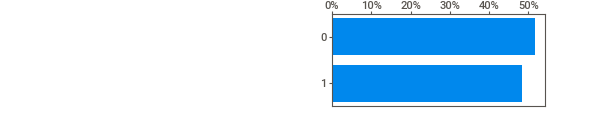
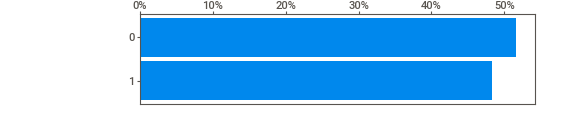
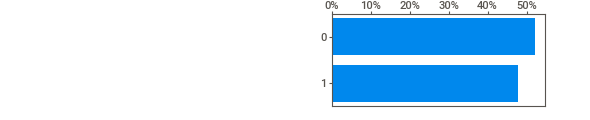
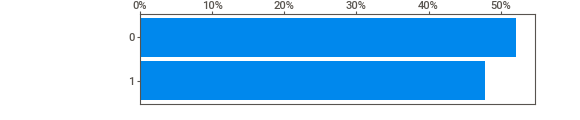
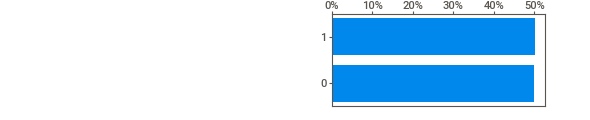
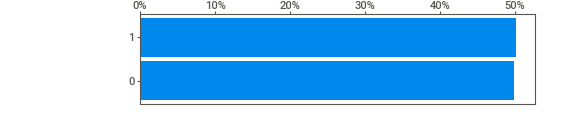
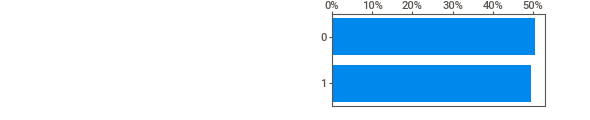
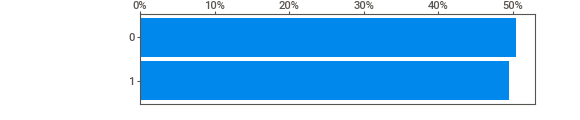
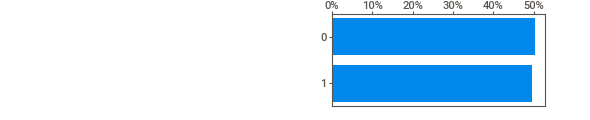
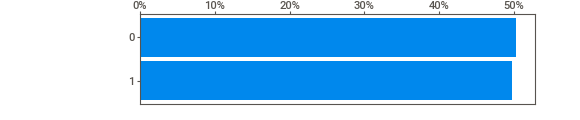
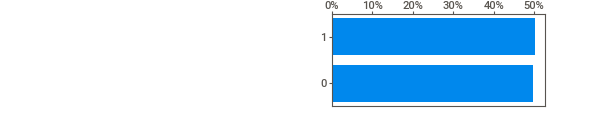
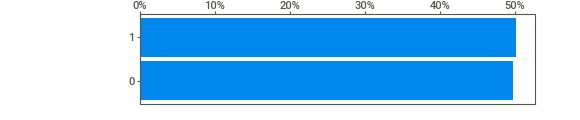
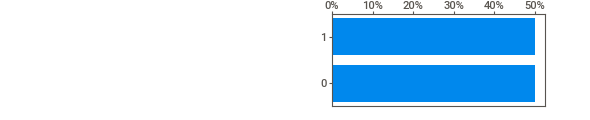
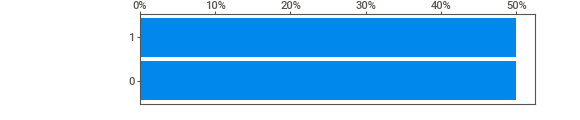
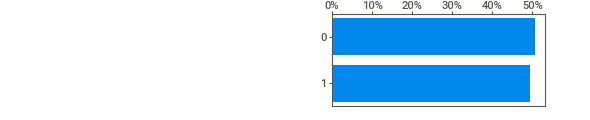
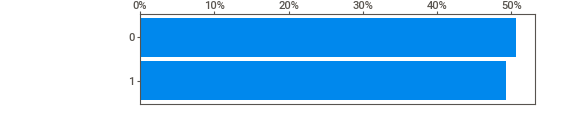
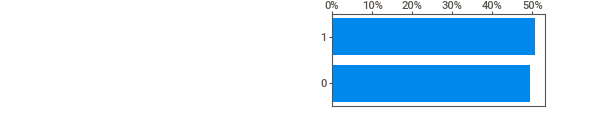
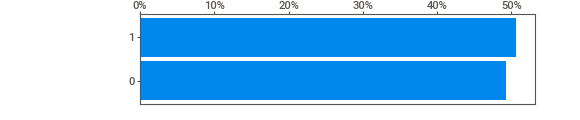
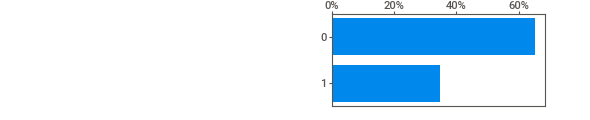
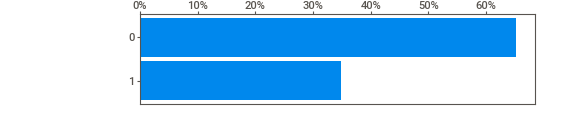
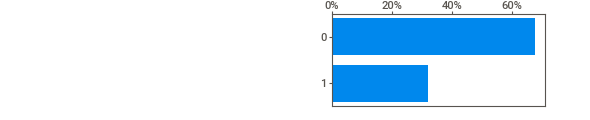
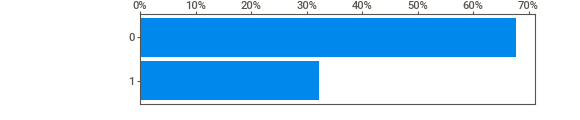
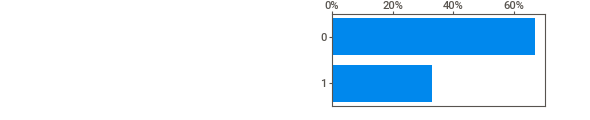
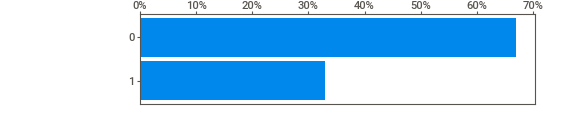
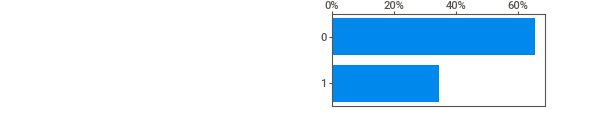
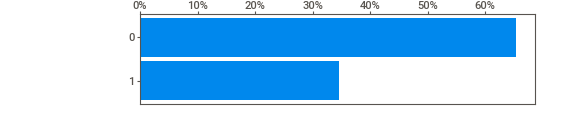
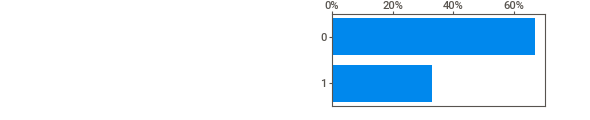
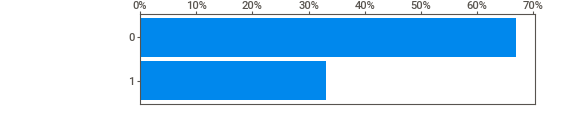
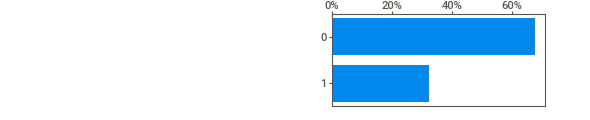
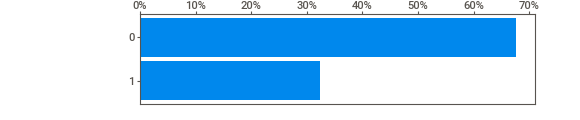
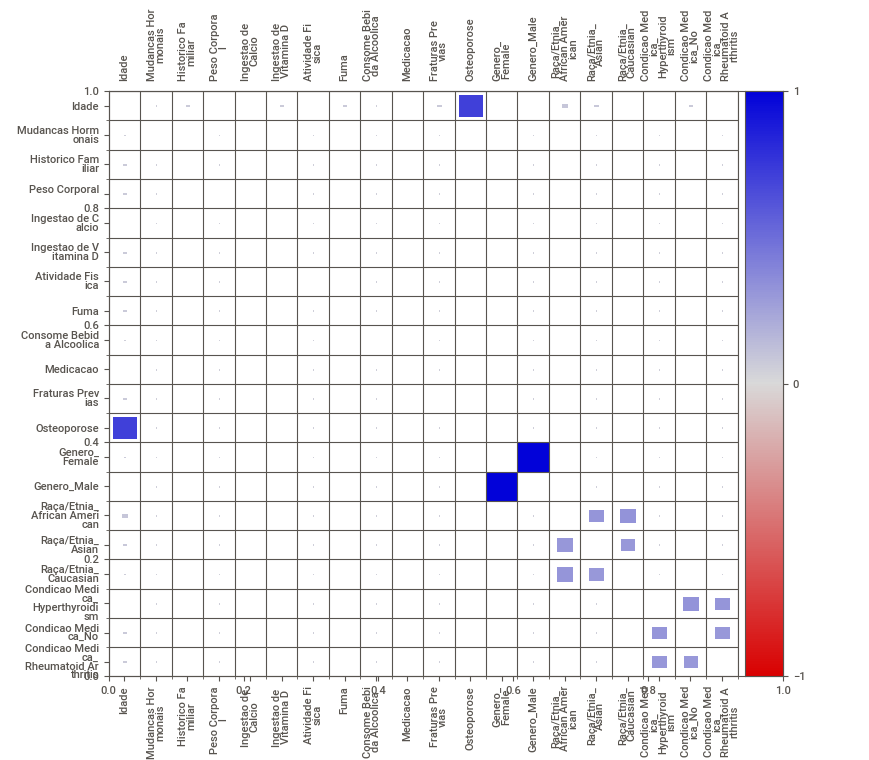
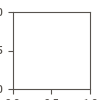

In [66]:
# analise dos dados com Sweetviz
dados = sv.analyze(df)

# Visualizando o relatorio com Sweetviz
dados.show_notebook()

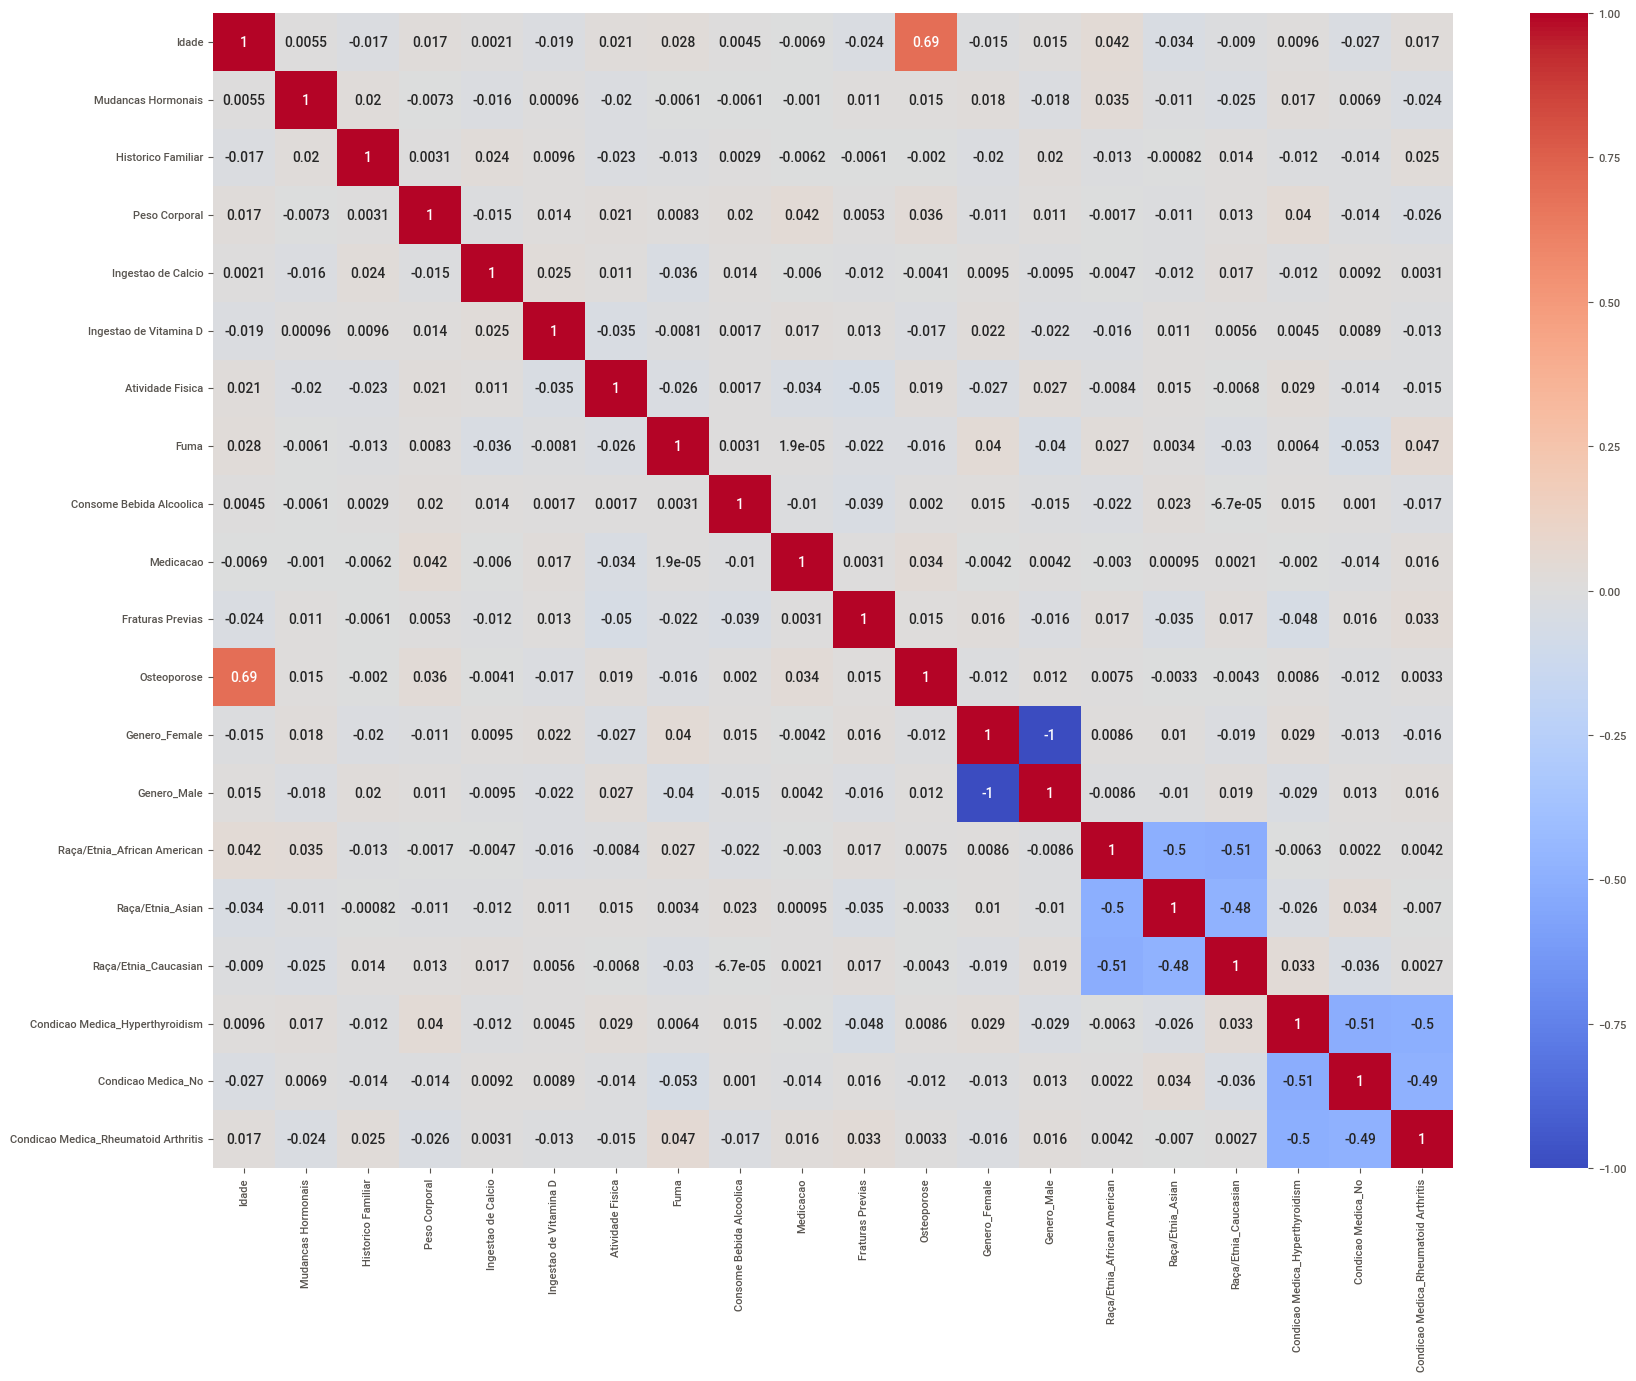

In [67]:
# Calcular Correlaçao da Matriz
corr_matrix = df.corr()

# Visualizar a correlação da Matriz usando Mapa de Calor (Heatmap)
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [68]:
import pygwalker as pyg
walker = pyg.walk(df)
walker

Box(children=(HTML(value='<div id="ifr-pyg-00061897903cdac5POCfKoBrS3WxUl9D" style="height: auto">\n    <head>…

In [69]:
# Verificar se o tipo dos dados da coluna Condicao Medica foram alteradas de object para int
df_condicao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Idade                                 1958 non-null   int64
 1   Mudancas Hormonais                    1958 non-null   int64
 2   Historico Familiar                    1958 non-null   int64
 3   Peso Corporal                         1958 non-null   int64
 4   Ingestao de Calcio                    1958 non-null   int64
 5   Ingestao de Vitamina D                1958 non-null   int64
 6   Atividade Fisica                      1958 non-null   int64
 7   Fuma                                  1958 non-null   int64
 8   Consome Bebida Alcoolica              1958 non-null   int64
 9   Medicacao                             1958 non-null   int64
 10  Fraturas Previas                      1958 non-null   int64
 11  Osteoporose                           1958 

### Idade que tem mais Casos de Pessoas Com Osteoporose?

In [71]:
# Trazer somente os dados onde a coluna osteoporose for igual a 1, onde indica que tem osteoporose
data_Idade = df[df['Osteoporose'] == 1]
data_Idade

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian,Condicao Medica_Hyperthyroidism,Condicao Medica_No,Condicao Medica_Rheumatoid Arthritis
0,69,0,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,0,0,1
1,32,0,1,1,1,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0
2,89,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,0
3,78,0,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,0,0,1
4,38,1,1,0,1,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,55,0,0,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0
975,68,1,0,1,1,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0
976,80,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,1,0
977,18,0,1,0,1,0,0,1,1,0,1,1,0,1,1,0,0,1,0,0


In [72]:
data_Idade.info()

<class 'lux.core.frame.LuxDataFrame'>
Index: 979 entries, 0 to 978
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Idade                                 979 non-null    int64
 1   Mudancas Hormonais                    979 non-null    int64
 2   Historico Familiar                    979 non-null    int64
 3   Peso Corporal                         979 non-null    int64
 4   Ingestao de Calcio                    979 non-null    int64
 5   Ingestao de Vitamina D                979 non-null    int64
 6   Atividade Fisica                      979 non-null    int64
 7   Fuma                                  979 non-null    int64
 8   Consome Bebida Alcoolica              979 non-null    int64
 9   Medicacao                             979 non-null    int64
 10  Fraturas Previas                      979 non-null    int64
 11  Osteoporose                           979 non-null

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Genero_Female'
counts = data_Idade['Idade'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Genero_Female
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Genero_Female
plt.title('Contagem Valores Idade que tem Osteoporose')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

print('############################################################')

#### Quem tem mais casos de Osteoporose, Homem ou Mulher?

In [ ]:
# Trazer somente os dados onde a coluna osteoporose for igual a 1, onde indica que tem osteoporose
data_Genero = df[df['Osteoporose'] == 1]
data_Genero

In [ ]:
data_Genero.info()

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Genero_Female'
counts = data_Genero['Genero_Female'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Genero_Female
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Genero_Female
plt.title('Contagem Valores Genero_Female Que tem Osteoporose')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

print('############################################################')

# contar o número de ocorrências de cada valor único na coluna 'Genero_Male'
counts = data_Genero['Genero_Male'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Genero_Male
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Genero_Male
plt.title('Contagem Valores Genero_Male Que tem Osteoporose')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

No Dataframe em questão podemos verificar que nos casos onde foram detectados Osteoporose, total são 979, sendo 502 casos homens e 477 Casos Mulheres. Sendo 4,99% mais casos onde Homens foram detecdados com Osteoporose do que mulheres.

Porém, no Dataframe em questão há total de casos Male igual a 502 sendo   02,63% a mais que os casos de Female que tem o total de 477 casos.
Tirando a porcentagem a mais que há nos casos sem a medição da diferenca de casos e a porcentagem que há de casos a mais, fica 02,36% casos onde Homem tem Osteoporose a mais do que as Mulheres.



#### Qual Raça Etnia tem mais casos de Osteoporose?

In [ ]:
# Trazer somente os dados onde a coluna osteoporose for igual a 1, onde indica que tem osteoporose
data_Raça_Etnia = df[df['Osteoporose'] == 1]
data_Raça_Etnia

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Raça/Etnia_African American'
counts_American = data_Raça_Etnia['Raça/Etnia_African American'].value_counts()
counts_American.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Raça/Etnia_African American
print(counts_American)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Raça/Etnia_African American
plt.title('Contagem Valores Raça/Etnia_African que tem Osteoporose')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

print('############################################################')

# contar o número de ocorrências de cada valor único na coluna 'Raça/Etnia_Asian'
counts_Asian = data_Raça_Etnia['Raça/Etnia_Asian'].value_counts()
counts_Asian.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Raça/Etnia_Asian
print(counts_Asian)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Raça/Etnia_Asian
plt.title('Contagem Valores Raça/Etnia_Asian Que tem Osteoporose')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

print('############################################################')

# contar o número de ocorrências de cada valor único na coluna 'Raça/Etnia_Caucasian'
counts_Caucasian = data_Raça_Etnia['Raça/Etnia_Caucasian'].value_counts()
counts_Caucasian.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Raça/Etnia_Caucasian
print(counts_Caucasian)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Raça/Etnia_Caucasian
plt.title('Contagem Valores Raça/Etnia_Caucasian Que tem Osteoporose')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

Conforme podemos verificar acima :
- African American tem total de casos de 681, sendo 344 diagnosticados com Osteoporose.
- Asian tem total de casos de 631, sendo 314 casos diagnosticados com Osteoporose.
- Caucasian tem total de casos de 646, sendo 321 casos diagnosticados com Osteoporose.

De 979 casos de Osteoporose no Dataframe, casos de Raça Etnia:
- African American tem 35,14% de casos de Osteoporose
- Asian tem 32,07% de casos de Osteoporose
- Caucasian tem 32,79% de casos de Osteoporose.

Porém, verificando casos totais, a Raca Etnia:
-  Asian tem 631 casos no Dataframe, sendo 314 casos diagnosticado com Osteoporose. Casos de Asian diagnosticados com osteoporose é de 49,76% perante a sua população total.
  
-  African American tem 681 casos no Dataframe que correspondem a 07,92% a mais que os casos de Raça/Etnia Asian, sendo 344 casos diagnosticados com Osteoporose.Casos de Caucasian diagnosticados com osteoporose é de 50,51% perante a sua população total.  


-  Caucasian tem 646 casos no Dataframe que correspondem a 02,37% a mais que os casos de Raça/Etnia Asian, sendo 321 casos diagnosticados com Osteoporose. Casos de African American diagnosticados com osteoporose é de 49,69% perante a sua população total. 


Sendo assim, podemos concluir que a Raça/Etnia que tem mais casos de Osteoporose é African American


##### Qual Sexo da Raça/Etnia Asian tem mais casos de Osteoporose?

In [ ]:
# Filtrar a Mulheres Asiaticas
df_novo_F_Total = df[((df['Raça/Etnia_Asian'] == 1) & (df['Genero_Female'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_novo_F_Total)

print('Numero de Mulheres Asiaticas na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar a Mulheres Asiaticas que tenham Osteoporose
df_novo_F_Total_Osteoporose = df[((df['Raça/Etnia_Asian'] == 1) & (df['Osteoporose'] == 1)& (df['Genero_Female'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_novo_F_Total_Osteoporose)

print('Numero de Mulheres Asiaticas que tem Osteoporose na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar a Homens Asiaticas
df_novo_M_Total = df[((df['Raça/Etnia_Asian'] == 1) & (df['Genero_Male'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_novo_M_Total)

print('Numero de Homens Asiaticos na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar a Mulheres Asiaticas que tenham Osteoporose
df_novo_M_Total_Osteoporose = df[((df['Raça/Etnia_Asian'] == 1) & (df['Osteoporose'] == 1)& (df['Genero_Male'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_novo_M_Total_Osteoporose)

print('Numero de Homens Asiaticos que tem Osteoporose na base de dados é:')
print(num_rows)

In [ ]:
# criar uma figura com dois subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plota as contagens de valores para cada coluna
# Definir qual dataframe utilizara, a cor e confeccao do grafico
counts1 = df_novo_M_Total_Osteoporose['Osteoporose'].value_counts()
counts1.plot(kind='bar', color='White', label='Não Osteoporose', ax=ax[0])
counts1.plot(kind='bar', color='blue', label='Com Osteoporose', ax=ax[0])
ax[0].set_title('Homens')
ax[0].set_xlabel('Com Osteoporose')
ax[0].set_ylabel('Count')
ax[0].legend()
print(f'Homens Asiaticos com {counts1}')

# Definir qual dataframe utilizara, a cor e confeccao do grafico
counts2 = df_novo_F_Total_Osteoporose['Osteoporose'].value_counts()
counts2.plot(kind='bar', color='blue', label='Não Osteoporose', ax=ax[1])
counts2.plot(kind='bar', color='pink', label='Com Osteoporose', ax=ax[1])
ax[1].set_title('Mulheres')
ax[1].set_xlabel('Com Osteoporose')
ax[1].set_ylabel('Quantidade')
ax[1].legend()
print(f'Mulheres Asiaticas com {counts2}')

# Titulo do grafico
fig.suptitle('Contagem Valores de Osteoporose por Genero Raça Asian')

# Mostrar o plot
plt.show()

Sendo assim, conforme podemos verificar casos das Pessoas de Raça Asiatica:
  - Mulheres Asiaticas: Na Base de Dados em questão há total de casos de Mulheres Asiáticas 316 casos sendo 149 casos onde foram diagnosticadas com Osteoporose. Verificando o total de casos com os casos diagnosticados com osteoporose em Mulheres Asiaticas a porcentagem é de 47,16%.
  - Homens Asiaticos: Na Base de Dados em questão há total de casos de Homens Asiáticos 315 casos sendo 165 casos onde foram diagnosticados com Osteoporose. 52,39%. Verificando o total de casos com os casos diagnosticados com osteoporose em Homens Asiaticas a porcentagem é de 52,39%
  
Nos casos de Asiaticos, tem mais casos de Homem com Osteoporose a Mulher asiatica com Osteoporose.

##### Qual Sexo da Raça/Etnia African American tem mais casos de Osteoporose?

In [ ]:
# Filtrar a Mulheres African American
df_American_F_Total = df[((df['Raça/Etnia_African American'] == 1) & (df['Genero_Female'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_American_F_Total)

print('Numero de Mulheres African American na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar a Mulheres African American que tenham Osteoporose
df_American_F_Total_Osteoporose = df[((df['Raça/Etnia_African American'] == 1) & (df['Osteoporose'] == 1)& (df['Genero_Female'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_American_F_Total_Osteoporose)

print('Numero de Mulheres African American que tem Osteoporose na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar Homens African American que tenham na Base de Dados
df_American_M_Total = df[((df['Raça/Etnia_African American'] == 1) & (df['Genero_Male'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_American_M_Total)

print('Numero de Homens African American na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar Homens African American que tenham Osteoporose
df_American_M_Total_Osteoporose = df[((df['Raça/Etnia_African American'] == 1) & (df['Osteoporose'] == 1)& (df['Genero_Male'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_American_M_Total_Osteoporose)

print('Numero de Homens African American que tem Osteoporose na base de dados é:')
print(num_rows)

In [ ]:
# criar uma figura com dois subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plota as contagens de valores para cada coluna
# Definir qual dataframe utilizara, a cor e confeccao do grafico
counts1 = df_American_M_Total_Osteoporose['Osteoporose'].value_counts()
counts1.plot(kind='bar', color='White', label='Não Osteoporose', ax=ax[0])
counts1.plot(kind='bar', color='blue', label='Com Osteoporose', ax=ax[0])
ax[0].set_title('Homens')
ax[0].set_xlabel('Com Osteoporose')
ax[0].set_ylabel('Count')
ax[0].legend()
print(f'Homens American African com {counts1}')

# Definir qual dataframe utilizara, a cor e confeccao do grafico
counts2 = df_American_F_Total_Osteoporose['Osteoporose'].value_counts()
counts2.plot(kind='bar', color='blue', label='Não Osteoporose', ax=ax[1])
counts2.plot(kind='bar', color='pink', label='Com Osteoporose', ax=ax[1])
ax[1].set_title('Mulheres')
ax[1].set_xlabel('Com Osteoporose')
ax[1].set_ylabel('Quantidade')
ax[1].legend()
print(f'Mulheres American African com {counts2}')

# Titulo do grafico
fig.suptitle('Contagem Valores de Osteoporose por Genero Raça American African')

# Mostrar o plot
plt.show()

Sendo assim, conforme podemos verificar casos das Pessoas de Raça American African:
  - Mulheres American African: Na Base de Dados em questão há total de casos de Mulheres American African 340 casos sendo 170 casos onde foram diagnosticadas com Osteoporose. Verificando o total de casos com os casos diagnosticados com osteoporose em Mulheres American African a porcentagem é de 50% das mulheres American African que constam na Base de Dados foram dignosticadas com Osteoporose.
  
  - Homens American African: Na Base de Dados em questão há total de casos de Homens American African 341 casos sendo 174 casos onde foram diagnosticados com Osteoporose. Verificando o total de casos com os casos diagnosticados com osteoporose em Homens American African a porcentagem é de 51,03% dos Homens American African que constam na base de Dados foram diagnosticados com Osteoporose.
  
Nos casos de American African, tem mais casos de Homens com Osteoporose a Mulher American African com Osteoporose.

##### Qual Sexo da Raça/Etnia Caucasian tem mais casos de Osteoporose?

In [ ]:
# Filtrar a Mulheres Caucasian
df_Caucasian_F_Total = df[((df['Raça/Etnia_Caucasian'] == 1) & (df['Genero_Female'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_Caucasian_F_Total)

print('Numero de Mulheres Caucasian na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar a Mulheres African American que tenham Osteoporose
df_Caucasian_F_Total_Osteoporose = df[((df['Raça/Etnia_Caucasian'] == 1) & (df['Osteoporose'] == 1)& (df['Genero_Female'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_Caucasian_F_Total_Osteoporose)

print('Numero de Mulheres Caucasian que tem Osteoporose na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar Homens African American que tenham na Base de Dados
df_Caucasian_M_Total = df[((df['Raça/Etnia_Caucasian'] == 1) & (df['Genero_Male'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_Caucasian_M_Total)

print('Numero de Homens Caucasian na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar Homens African American que tenham Osteoporose
df_Caucasian_M_Total_Osteoporose = df[((df['Raça/Etnia_Caucasian'] == 1) & (df['Osteoporose'] == 1)& (df['Genero_Male'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_Caucasian_M_Total_Osteoporose)

print('Numero de Homens Caucasian que tem Osteoporose na base de dados é:')
print(num_rows)

In [ ]:
# criar uma figura com dois subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plota as contagens de valores para cada coluna
# Definir qual dataframe utilizara, a cor e confeccao do grafico
counts1 = df_Caucasian_M_Total_Osteoporose['Osteoporose'].value_counts()
counts1.plot(kind='bar', color='White', label='Não Osteoporose', ax=ax[0])
counts1.plot(kind='bar', color='blue', label='Com Osteoporose', ax=ax[0])
ax[0].set_title('Homens')
ax[0].set_xlabel('Com Osteoporose')
ax[0].set_ylabel('Count')
ax[0].legend()
print(f'Homens Caucasian com {counts1}')

# Definir qual dataframe utilizara, a cor e confeccao do grafico
counts2 = df_Caucasian_F_Total_Osteoporose['Osteoporose'].value_counts()
counts2.plot(kind='bar', color='White', label='Não Osteoporose', ax=ax[1])
counts2.plot(kind='bar', color='pink', label='Com Osteoporose', ax=ax[1])
ax[1].set_title('Mulheres')
ax[1].set_xlabel('Com Osteoporose')
ax[1].set_ylabel('Quantidade')
ax[1].legend()
print(f'Mulheres Caucasian com {counts2}')

# Titulo do grafico
fig.suptitle('Contagem Valores de Osteoporose por Genero Raça American African')

# Mostrar o plot
plt.show()

Sendo assim, conforme podemos verificar casos das Pessoas de Raça Caucasian:
  - Mulheres Caucasian: Na Base de Dados em questão há total de casos de Mulheres Caucasian 310 casos sendo 158 casos onde foram diagnosticadas com Osteoporose. Verificando o total de casos com os casos diagnosticados com osteoporose em Mulheres Caucasian a porcentagem é de 50,97% das mulheres Caucasian que constam na Base de Dados foram dignosticadas com Osteoporose.
  
  - Homens Caucasian: Na Base de Dados em questão há total de casos de Homens American African 336 casos sendo 163 casos onde foram diagnosticados com Osteoporose. Verificando o total de casos com os casos diagnosticados com osteoporose em Homens Caucasian a porcentagem é de 48,51% dos Homens Caucasian que constam na base de Dados foram diagnosticados com Osteoporose.
  
Nos casos de Caucasian, tem mais casos de Mulheres com Osteoporose a Homens Caucasian com Osteoporose.

O conjunto de dados oferece informações abrangentes sobre os fatores de saúde que influenciam o desenvolvimento da osteoporose, incluindo detalhes demográficos, escolhas de estilo de vida, histórico médico e indicadores de saúde óssea. O objetivo é facilitar a pesquisa na previsão da osteoporose, permitindo que modelos de aprendizado de máquina identifiquem indivíduos em risco. A análise de fatores como idade, sexo, alterações hormonais e hábitos de vida pode ajudar a melhorar o manejo da osteoporose e as estratégias de prevenção.

- Pode-se dizer que mudanças hormonais tenham relação direta com a incidência de osteoporose em pacientes?
- Quais são os fatores mais relevantes para a determinação de osteoporose? isso se aplica em todas as etnias?
- Qual o perfil médio dos pacientes com osteoporose?
- Qual a idade mais afetada?
- Tem uma faixa etária mais atingida nos pacientes?
- O Historico familiar é algum fator a ser levado em conta?

### Preparação Dos Dados

In [ ]:
pip install shapash[report]

In [ ]:
# bibliotecas
import pandas as pd
import numpy as np

# Dividir os dados
from sklearn.model_selection import train_test_split

# Métricas de desempenho
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            recall_score,
                            accuracy_score,
                            precision_score,
                            f1_score)

# Modelo Arvore de Decisão (decision Tree) e Floresta Aleatoria (Random Forest) 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from shapash import SmartExplainer
from sklearn.ensemble import RandomForestClassifier



In [ ]:
# Verificar a distribuicão da variavel alvo 'Osteoporose'
df['Osteoporose'].value_counts(True)

In [ ]:
# Separa as variáveis independentes das dependentes
X = df.drop('Osteoporose', axis=1)
Y = df['Osteoporose']

# Cria variáveis fictícias
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Divide os dados em conjunto de treinamento, validação e teste

# Divide os dados em duas partes: Treinamento e Temporário
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.5, random_state=42, stratify=Y)

# Divide o conjunto temporário em validação e teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

In [ ]:
# Verificando o equilíbrio da classe para dados completos, conjunto de treinamento, conjunto de validação e conjunto de teste

print("Razão do valor alvo em y")
print(Y.value_counts(1))
print("#" * 40)
print("Razão do valor alvo em y_train")
print(y_train.value_counts(1))
print("#" * 40)
print("Razão do valor alvo em y_val")
print(y_val.value_counts(1))
print("#" * 40)
print("Razão do valor alvo em y_test")
print(y_test.value_counts(1))
print("#" * 40)

### Construção de Modelos de Previsão

- Análise Potencial: Modelagem Preditiva: Desenvolva modelos de aprendizado de máquina para prever a probabilidade de osteoporose com base nos recursos fornecidos. Esta análise é crucial para identificar indivíduos em risco de osteoporose, possibilitando intervenções precoces e estratégias de prevenção.

#### Arvore de Decisao Classificadora

In [ ]:
# Construcao da árvore de decisão
dtree = DecisionTreeClassifier(random_state=30, max_depth=5)

# Treine a árvore de decisão
dtree.fit(X_train, y_train)

In [ ]:
print(pd.DataFrame(dtree.feature_importances_, columns=['imp'], index=X_train.columns))

##### Desempenho do modelo construido com Arvore de Decisao (Decision Tree)

In [ ]:
# Prever o alvo para os conjuntos de treinamento e validação
pred_train = dtree.predict(X_train)
pred_val = dtree.predict(X_val)

In [ ]:
# Accuracy: mede a proporção de previsões corretas em relação ao total de previsões
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_val, pred_val))

In [ ]:
#precision: mede a proporção de previsões positivas verdadeiras entre todas as previsões positivas.
print(precision_score(y_train, pred_train))
print(precision_score(y_val, pred_val))

In [ ]:
#Recall (Sensibilidade): Mede a proporção de previsões positivas verdadeiras de todas as instâncias positivas reais.
print(recall_score(y_train, pred_train))
print(recall_score(y_val, pred_val))

In [ ]:
# Pontuação F1: É a média harmônica de precisão e recuperação.
print(f1_score(y_train, pred_train))
print(f1_score(y_val, pred_val))

In [ ]:
# Pontuação ROC AUC: Mede a área sob a curva característica de operação do receptor (ROC).
print(roc_auc_score(y_train, pred_train, multi_class='ovr'))
print(roc_auc_score(y_val, pred_val, multi_class='ovr'))

#### Floresta Aleatoria (Random Forest)

In [ ]:
# Criar um objeto RandomForestClassifier
RFC = RandomForestClassifier(random_state=42)

# Ajustar o modelo aos dados de treinamento
RFC.fit(X_train, y_train)

In [ ]:
print(pd.DataFrame(RFC.feature_importances_, columns=['imp'], index=X_train.columns))

O SmartExplainerfrom shapashé uma ferramenta poderosa para explicar modelos de aprendizado de máquina. Fornece uma maneira simples e intuitiva de entender como seu modelo está fazendo previsões.

https://github.com/MAIF/shapash?tab=readme-ov-file

In [ ]:
xpl = SmartExplainer(model=RFC)
xpl.compile(X_train)
app = xpl.run_app()

##### Desempenho do Modelo Random Forest Construido

In [ ]:
# Prever o alvo para os conjuntos de treinamento e validação
pred_RFC_train = RFC.predict(X_train)
pred_RFC_val = RFC.predict(X_val)

In [ ]:
# Accuracy: mede a proporção de previsões corretas em relação ao total de previsões
print(accuracy_score(y_train, pred_RFC_train))
print(accuracy_score(y_val, pred_RFC_val))

In [ ]:
#precision: mede a proporção de previsões positivas verdadeiras entre todas as previsões positivas.
print(precision_score(y_train, pred_RFC_train))
print(precision_score(y_val, pred_RFC_val))

In [ ]:
#Recall (Sensibilidade): Mede a proporção de previsões positivas verdadeiras de todas as instâncias positivas reais.
print(recall_score(y_train, pred_RFC_train))
print(recall_score(y_val, pred_RFC_val))

In [ ]:
# Pontuação F1: É a média harmônica de precisão e recuperação.
print(f1_score(y_train, pred_RFC_train))
print(f1_score(y_val, pred_RFC_val))

In [ ]:
# Pontuação ROC AUC: Mede a área sob a curva característica de operação do receptor (ROC).
print(roc_auc_score(y_train, pred_RFC_train, multi_class='ovr'))
print(roc_auc_score(y_val, pred_RFC_val, multi_class='ovr'))

In [ ]:
# Matriz de confusão para dados de validação
cm = confusion_matrix(y_val, pred_RFC_val)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()